### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) 

In [2]:
dataset=pd.read_csv('Ds_Data.csv')

### Making a copy of dataset

In [3]:
df_copy=dataset.copy()

In [4]:
df_copy.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


### Understanding the data

In [5]:
df_copy.shape

(12684, 25)

In [6]:
df_copy.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Accept(Y/N?)'], dtype='object')

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

### Getting statistical description

In [8]:
df_copy.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Finding missing values

In [9]:
df_copy.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [10]:
(df_copy.isnull().sum() / len(df_copy)) * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

Columns with missing values : 
- car                     99.148534
- Bar                      0.843582
- CoffeeHouse              1.710817
- CarryAway                1.190476
- RestaurantLessThan20     1.024913
- Restaurant20To50         1.490066

In [11]:
df_copy.drop('car',axis=1,inplace=True)

In [12]:
df_copy.head(3)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1


### Getting information on types of coupons

In [13]:
df_copy['Bar'].describe()

count     12577
unique        5
top       never
freq       5197
Name: Bar, dtype: object

In [14]:
df_copy['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [15]:
df_copy['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [16]:
df_copy['Bar'] = df_copy['Bar'].fillna('never')

In [17]:
df_copy['Bar'].isnull().sum()

0

In [18]:
df_copy['CoffeeHouse'].describe()

count     12467
unique        5
top       less1
freq       3385
Name: CoffeeHouse, dtype: object

In [19]:
df_copy['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [20]:
df_copy['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [21]:
df_copy['CoffeeHouse']=df_copy['CoffeeHouse'].fillna('less1')

In [22]:
df_copy['CoffeeHouse'].isnull().sum()

0

In [23]:
df_copy.head(5)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [24]:
df_copy['CarryAway'].describe()

count     12533
unique        5
top         1~3
freq       4672
Name: CarryAway, dtype: object

In [25]:
df_copy['CarryAway'].unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [26]:
df_copy['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [27]:
df_copy['CarryAway']=df_copy['CarryAway'].fillna('1~3')

In [28]:
df_copy['CarryAway'].isnull().sum()

0

In [29]:
df_copy['RestaurantLessThan20'].describe()

count     12554
unique        5
top         1~3
freq       5376
Name: RestaurantLessThan20, dtype: object

In [30]:
df_copy['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [31]:
df_copy['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [32]:
df_copy['RestaurantLessThan20'] = df_copy['RestaurantLessThan20'].fillna('1~3')

In [33]:
df_copy['RestaurantLessThan20'].isnull().sum()

0

In [34]:
df_copy['Restaurant20To50'].describe()

count     12495
unique        5
top       less1
freq       6077
Name: Restaurant20To50, dtype: object

In [35]:
df_copy['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

In [36]:
df_copy['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [37]:
df_copy['Restaurant20To50'] = df_copy['Restaurant20To50'].fillna('less1')

In [38]:
df_copy.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [39]:
#Missing values are handled

In [40]:
df_copy.head(5)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0


### Working on features

In [41]:
df_copy['destination'].unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [42]:
df_copy.head(5)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0


### Plotting features to understand and get insights

******************************************************************************************************************************************************
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


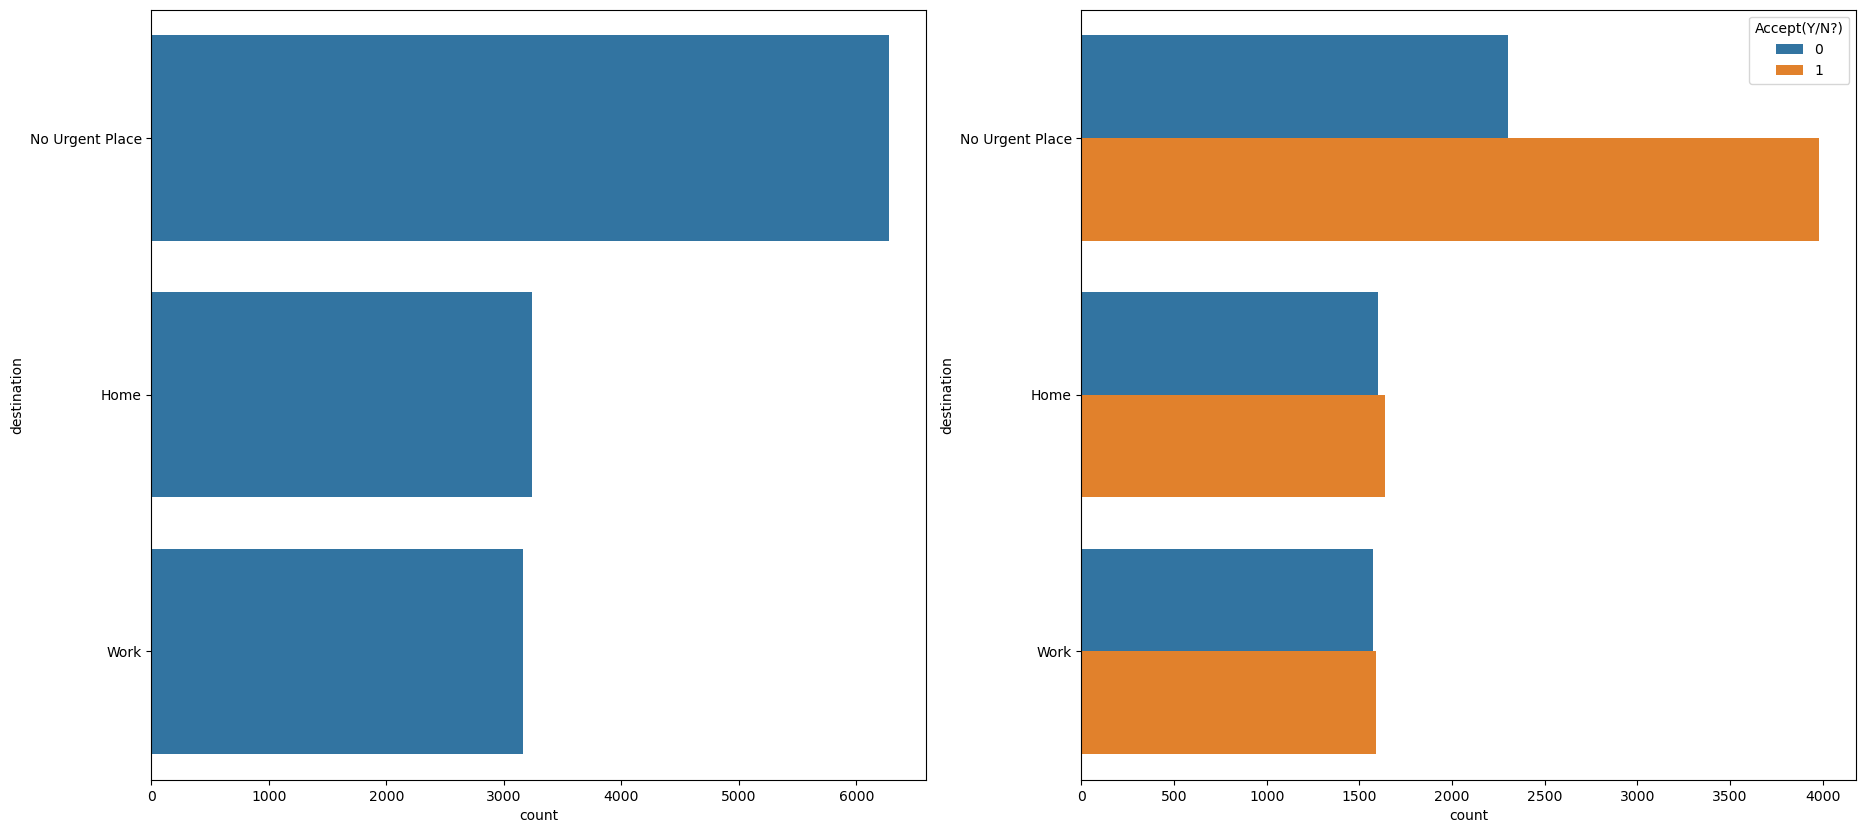

******************************************************************************************************************************************************
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


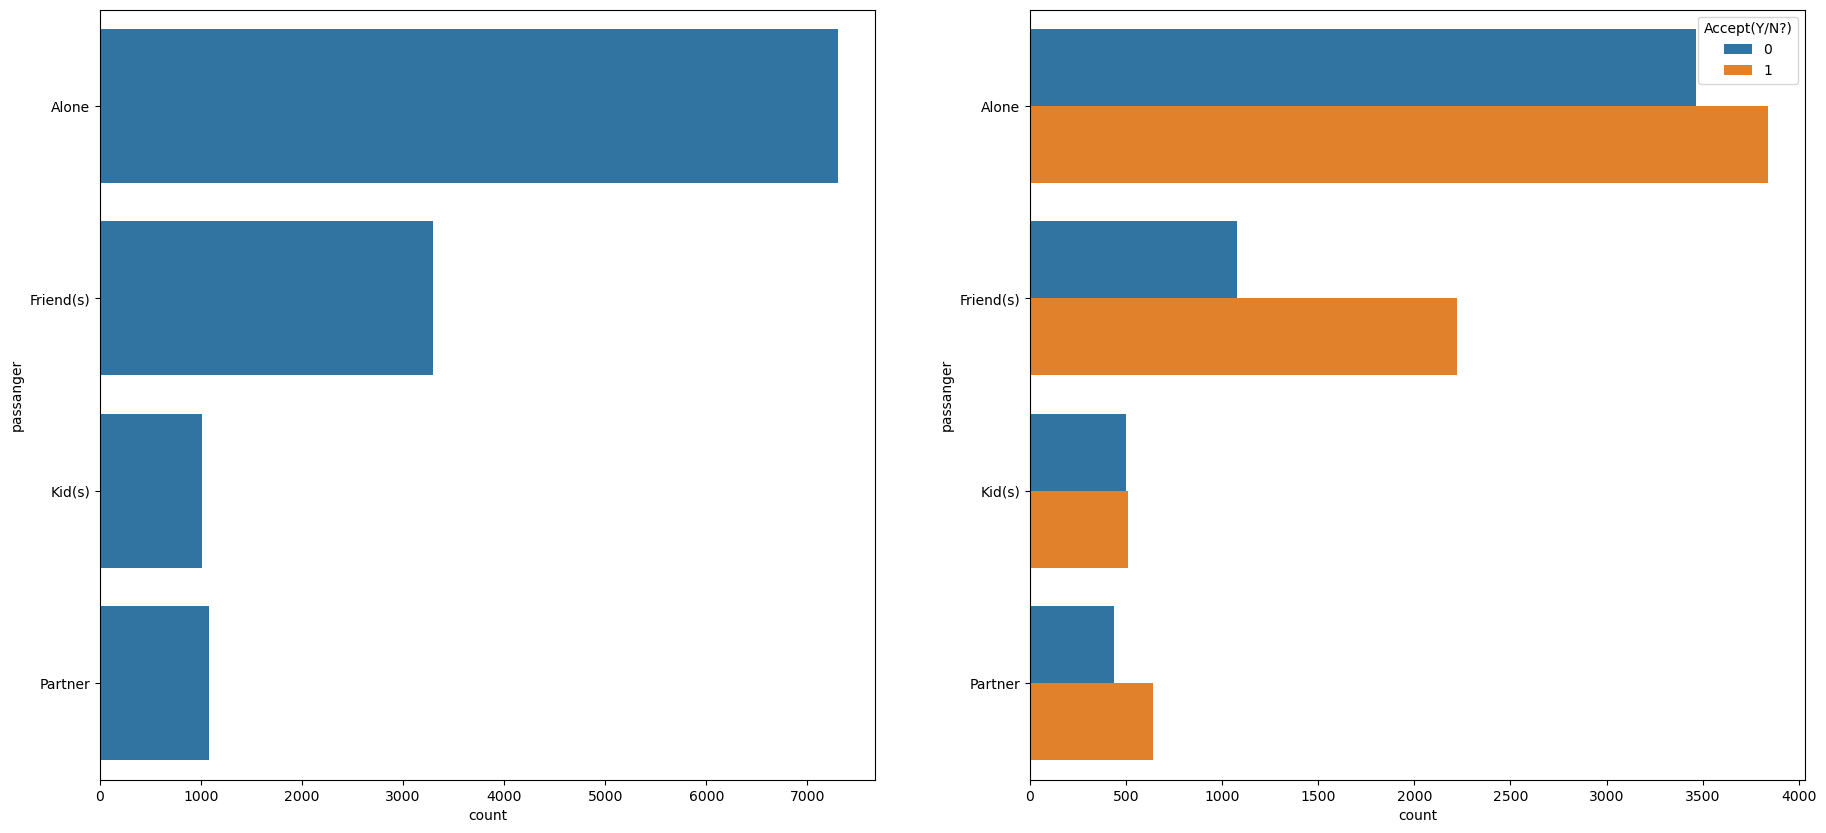

******************************************************************************************************************************************************
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


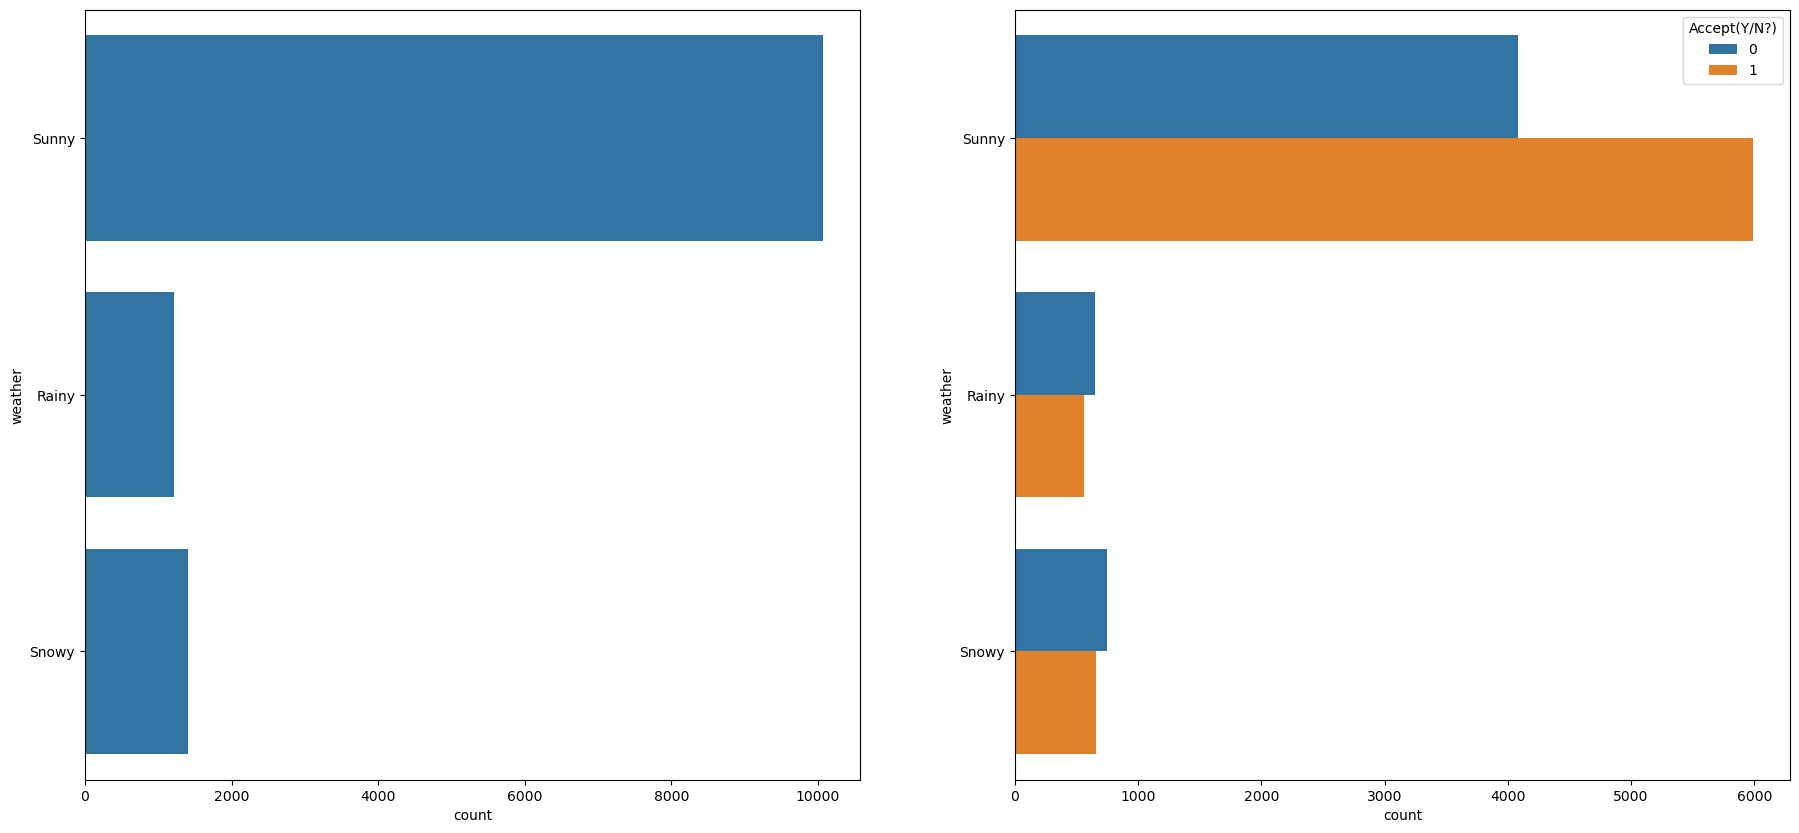

******************************************************************************************************************************************************
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


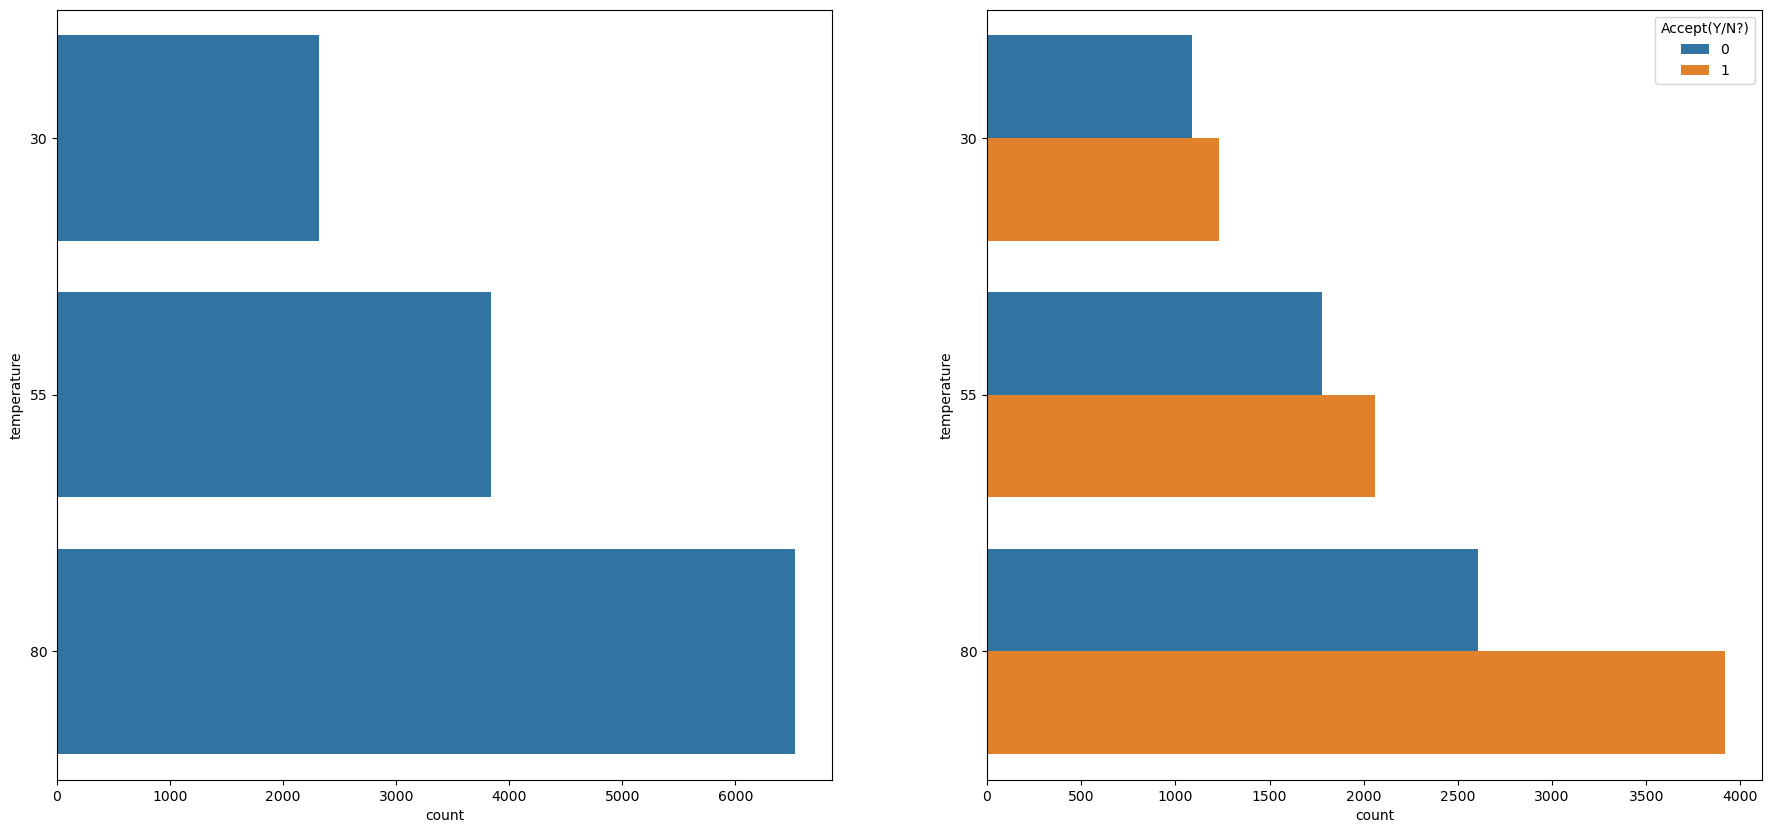

******************************************************************************************************************************************************
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


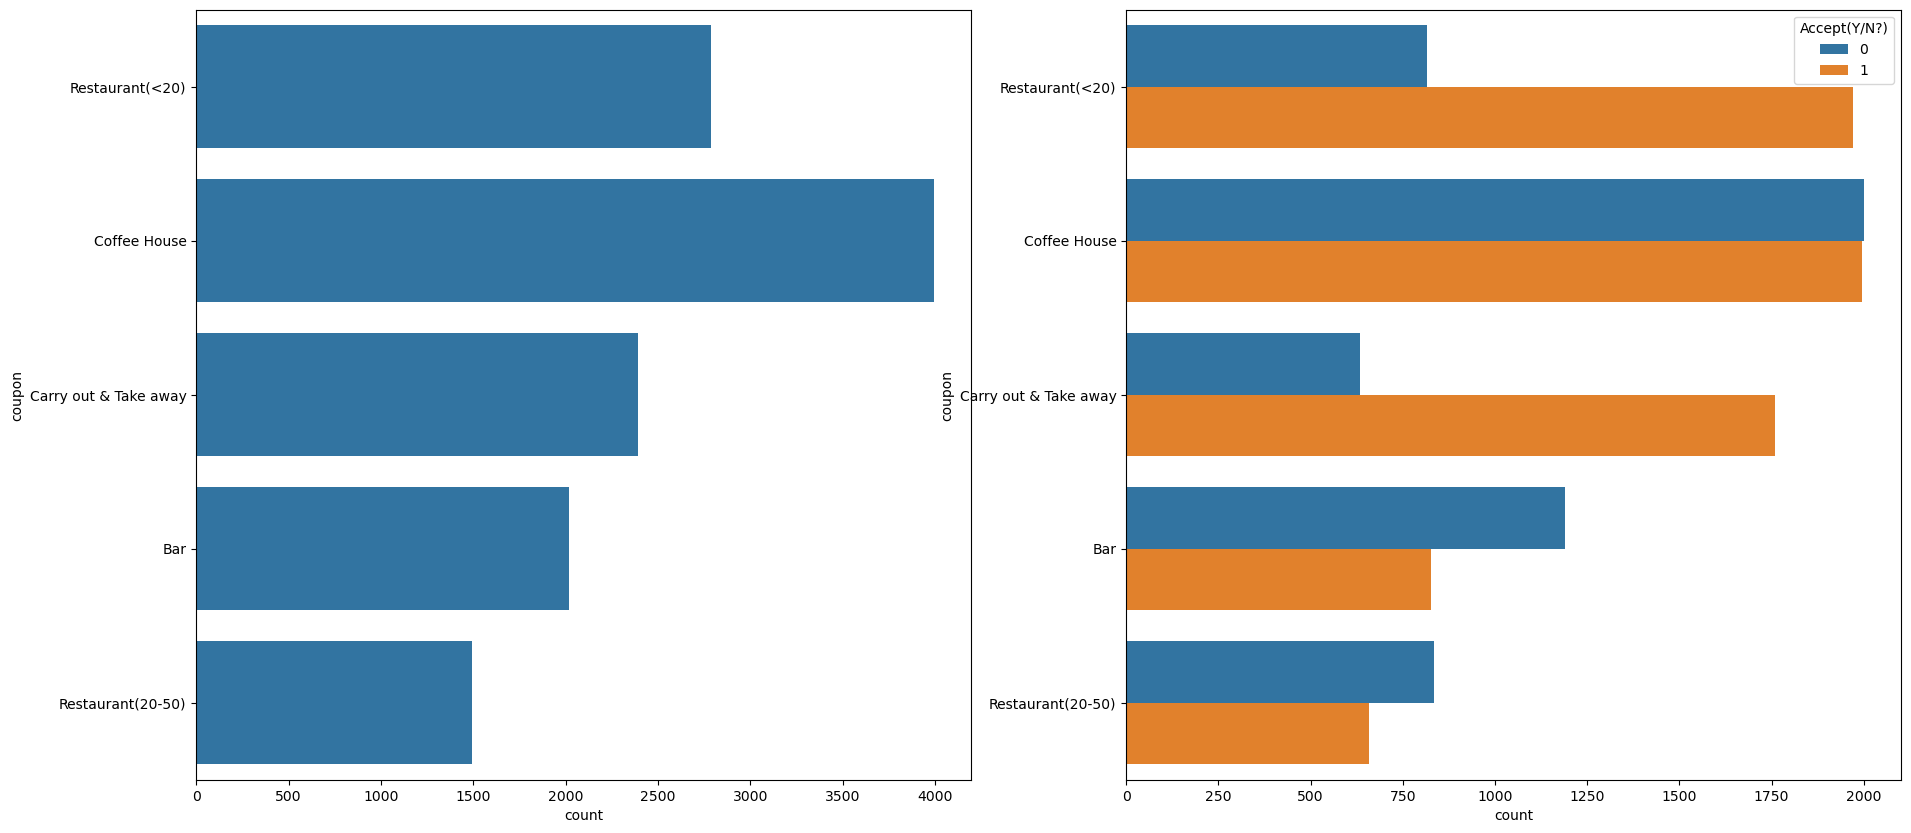

******************************************************************************************************************************************************
expiration
1d    7091
2h    5593
Name: count, dtype: int64


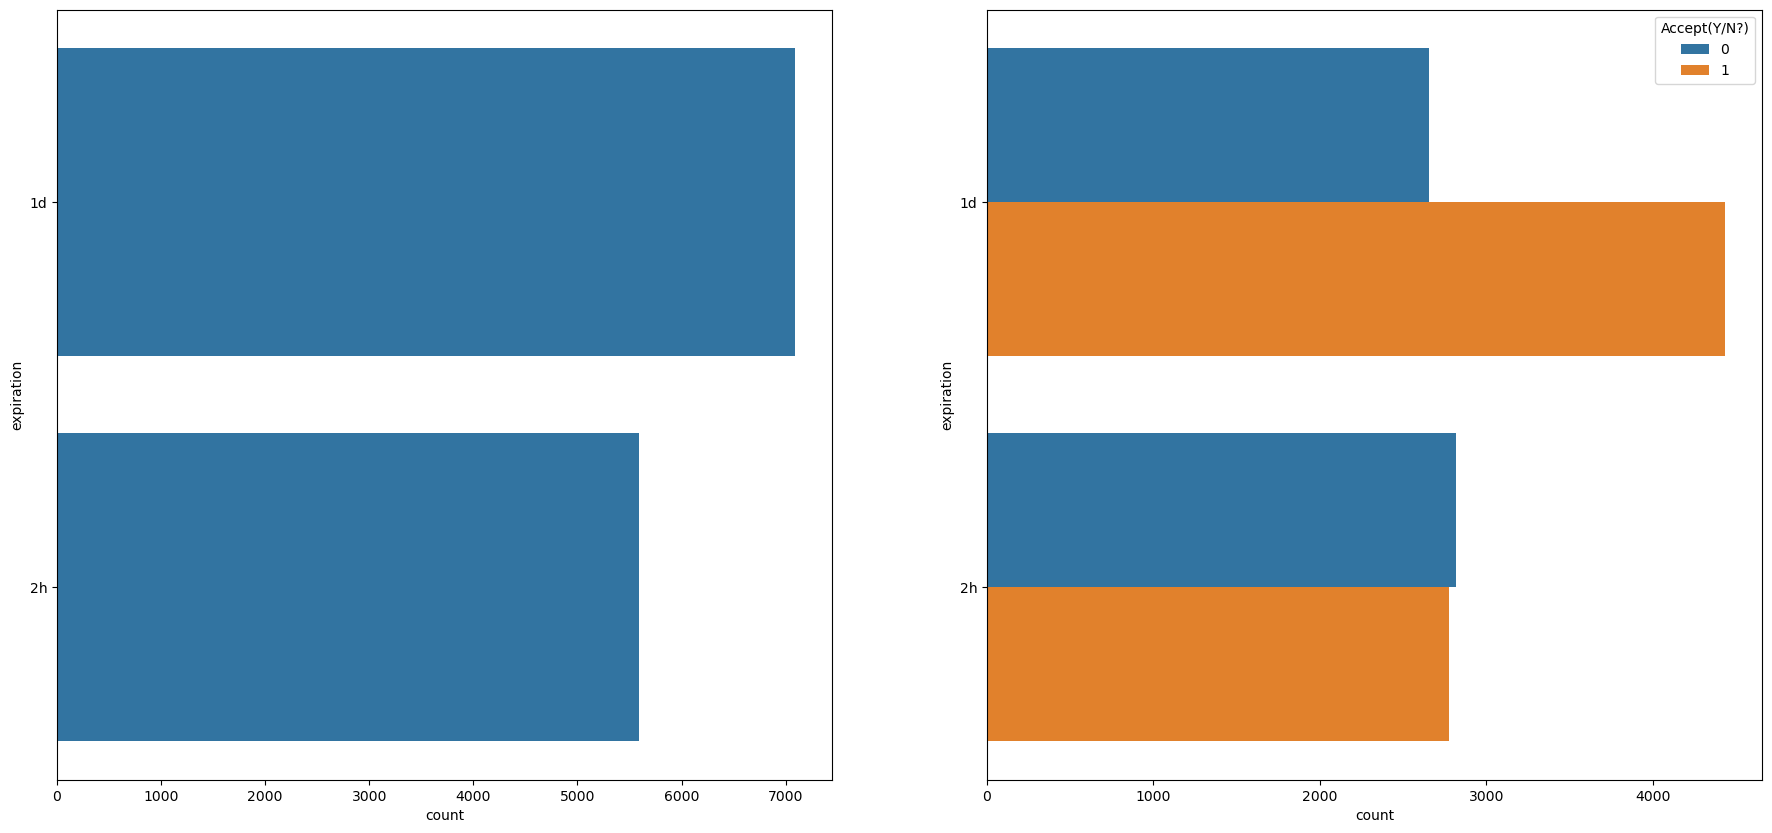

******************************************************************************************************************************************************
gender
Female    6511
Male      6173
Name: count, dtype: int64


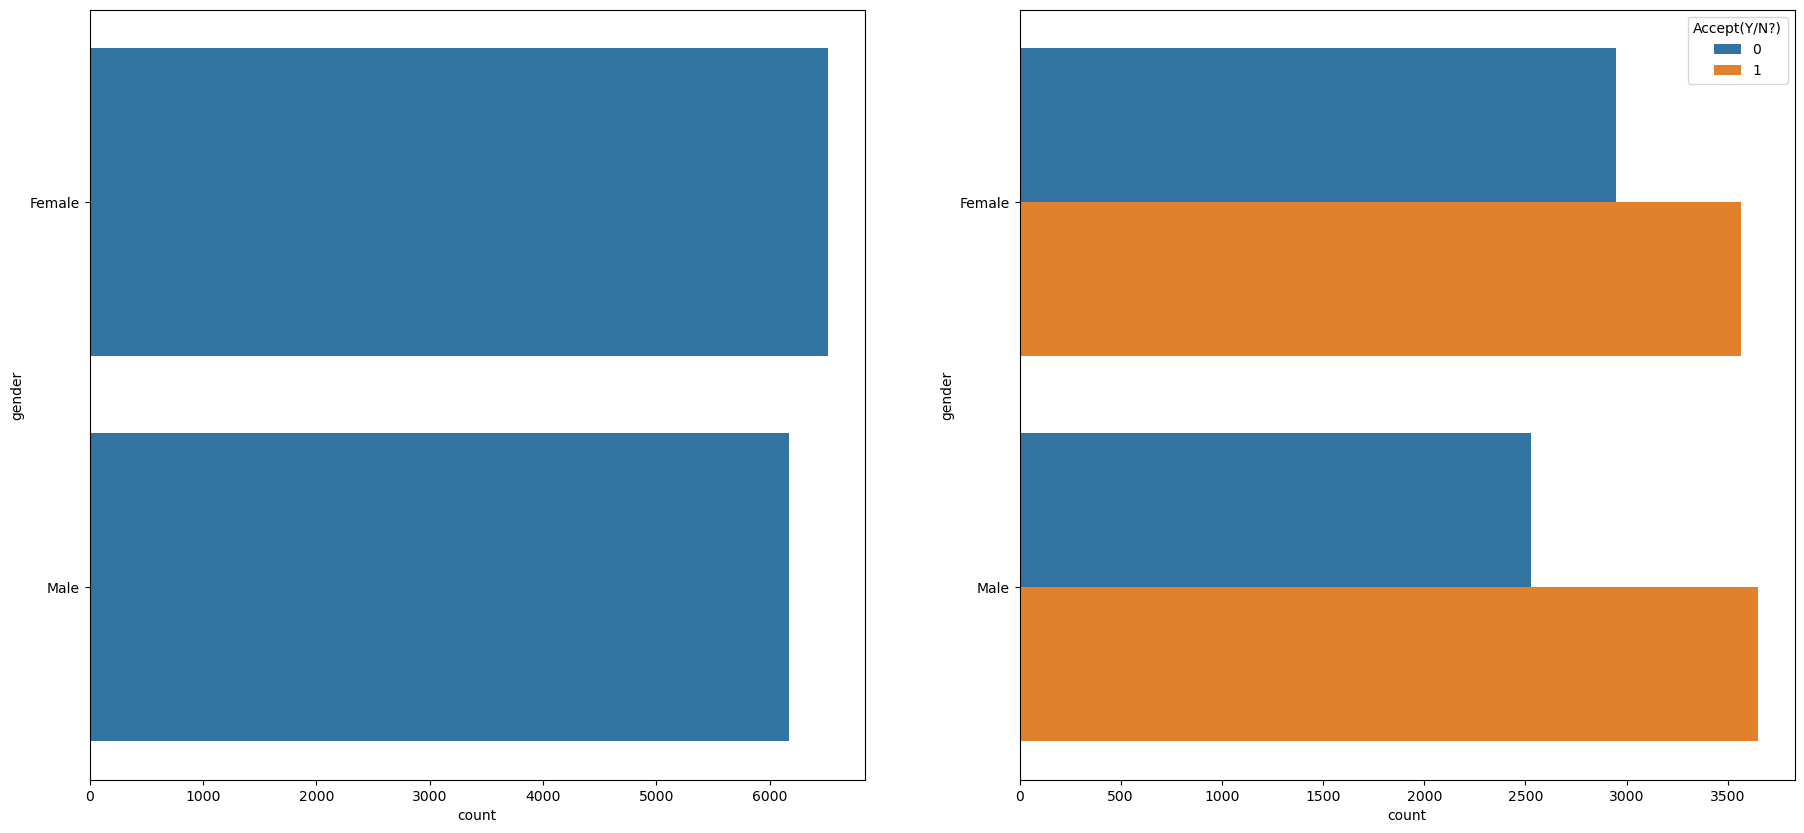

******************************************************************************************************************************************************
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


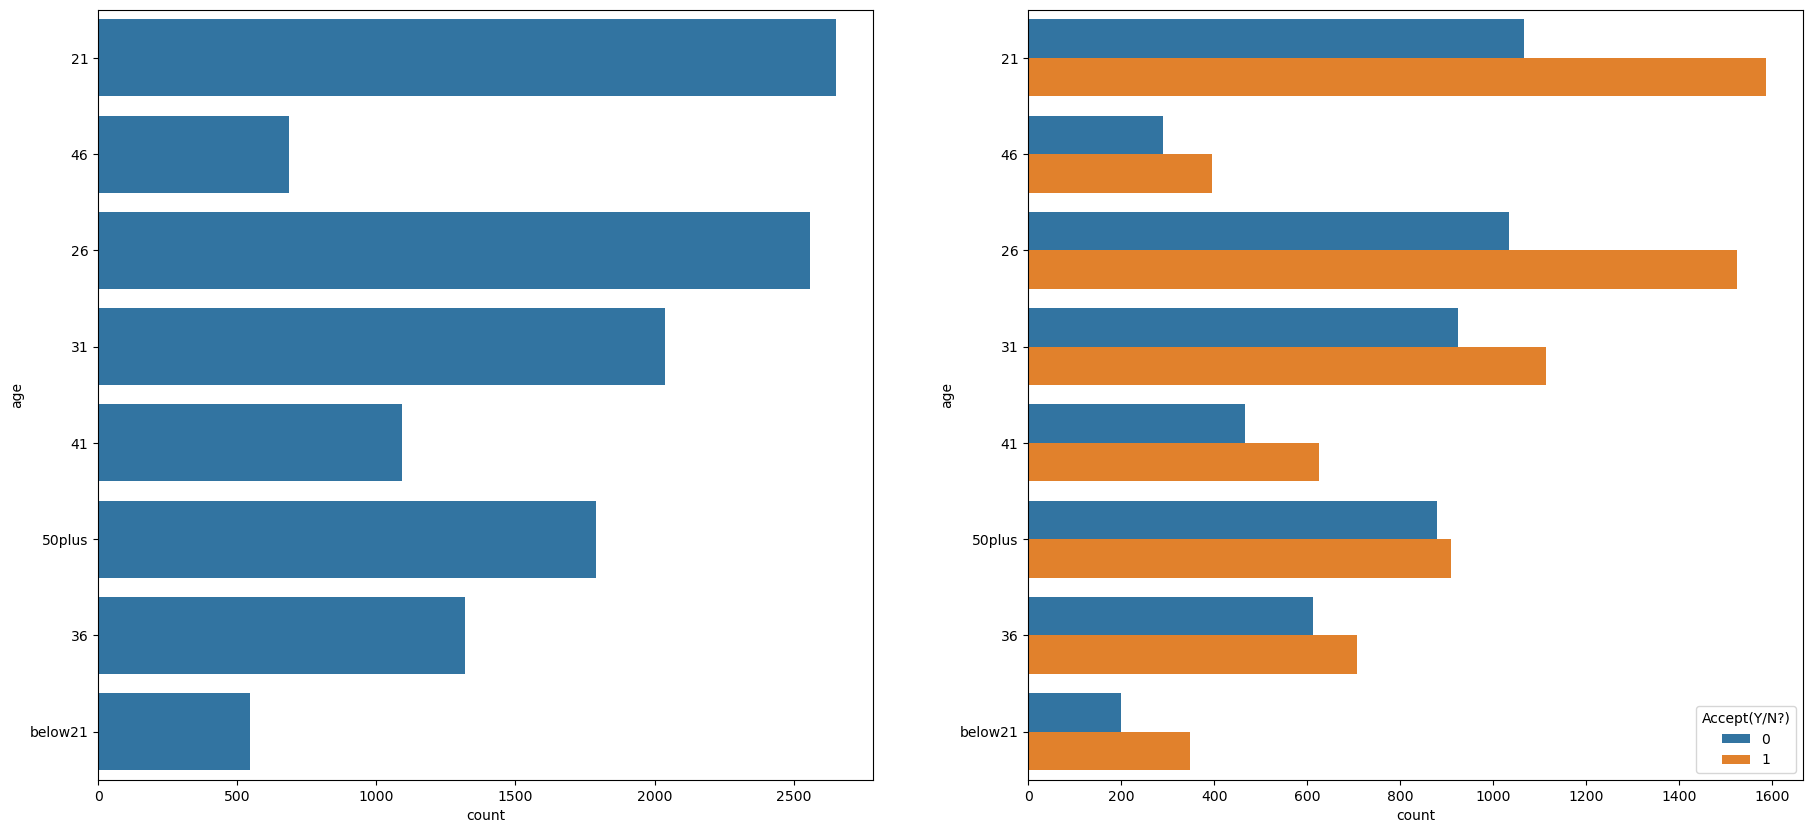

******************************************************************************************************************************************************
maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64


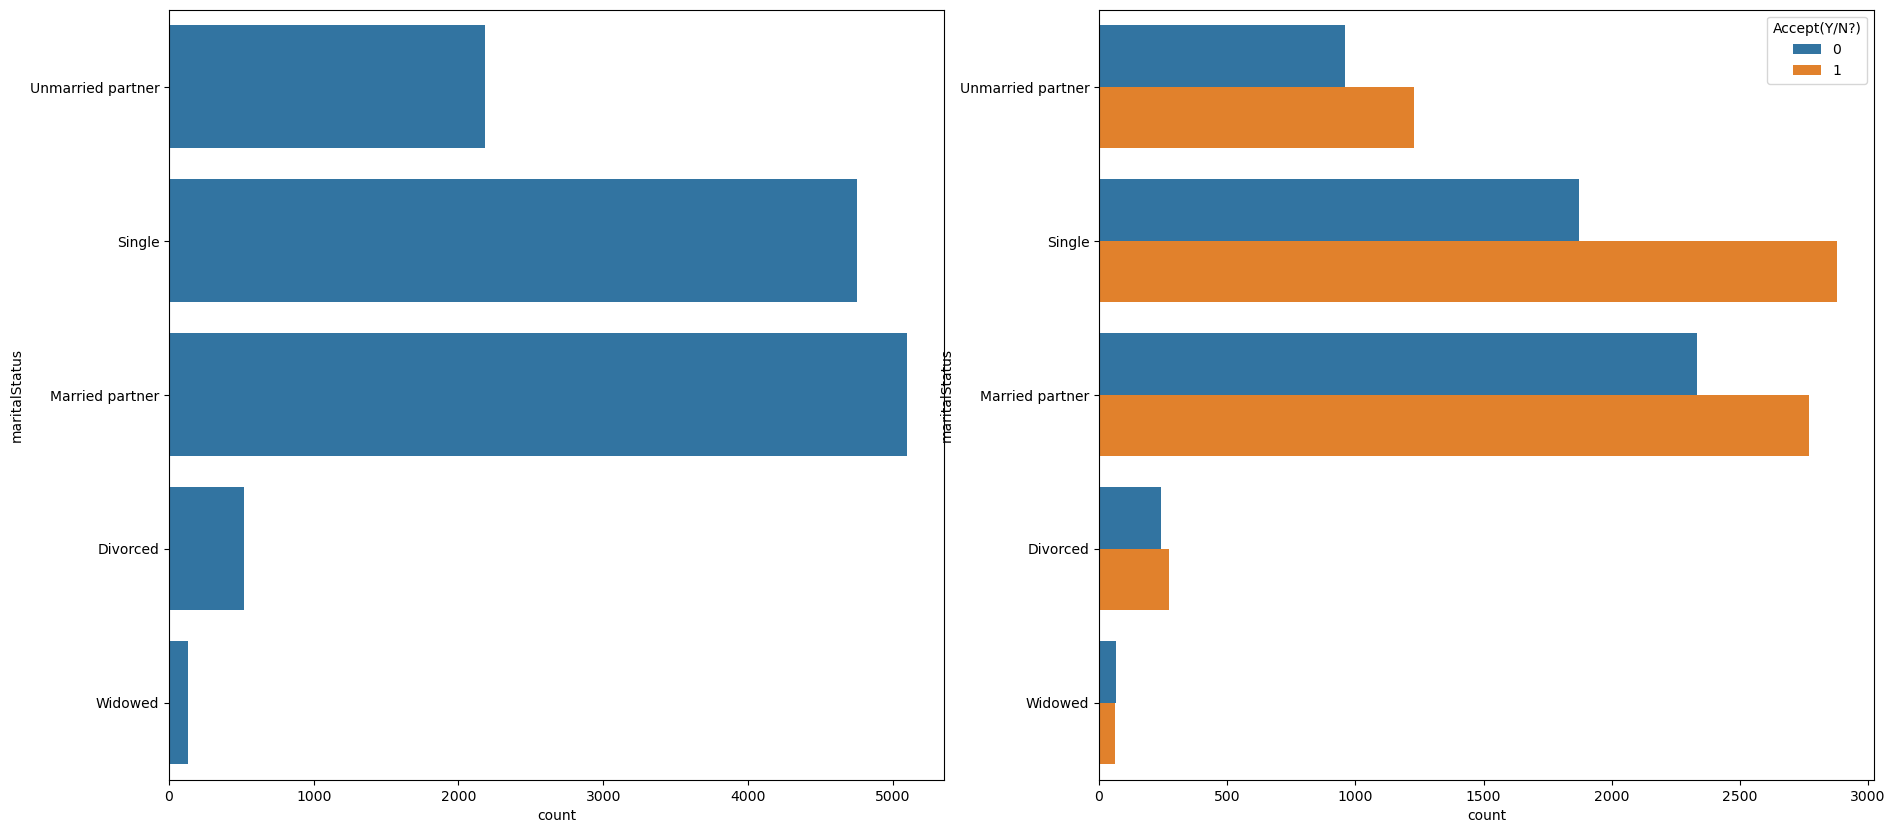

******************************************************************************************************************************************************
has_children
0    7431
1    5253
Name: count, dtype: int64


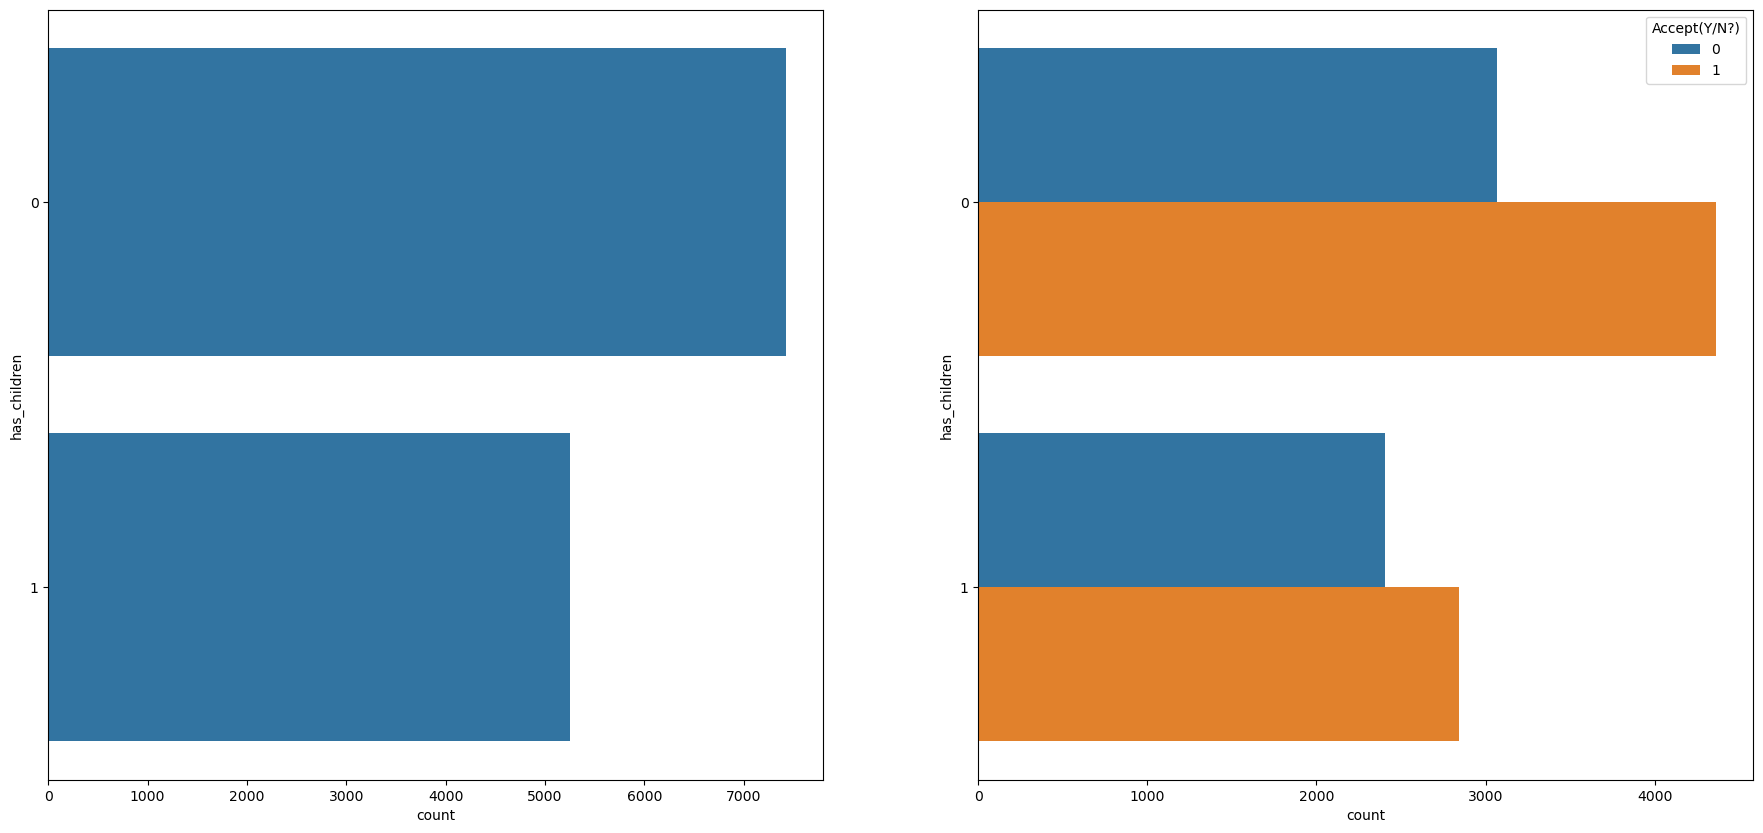

******************************************************************************************************************************************************
education
Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: count, dtype: int64


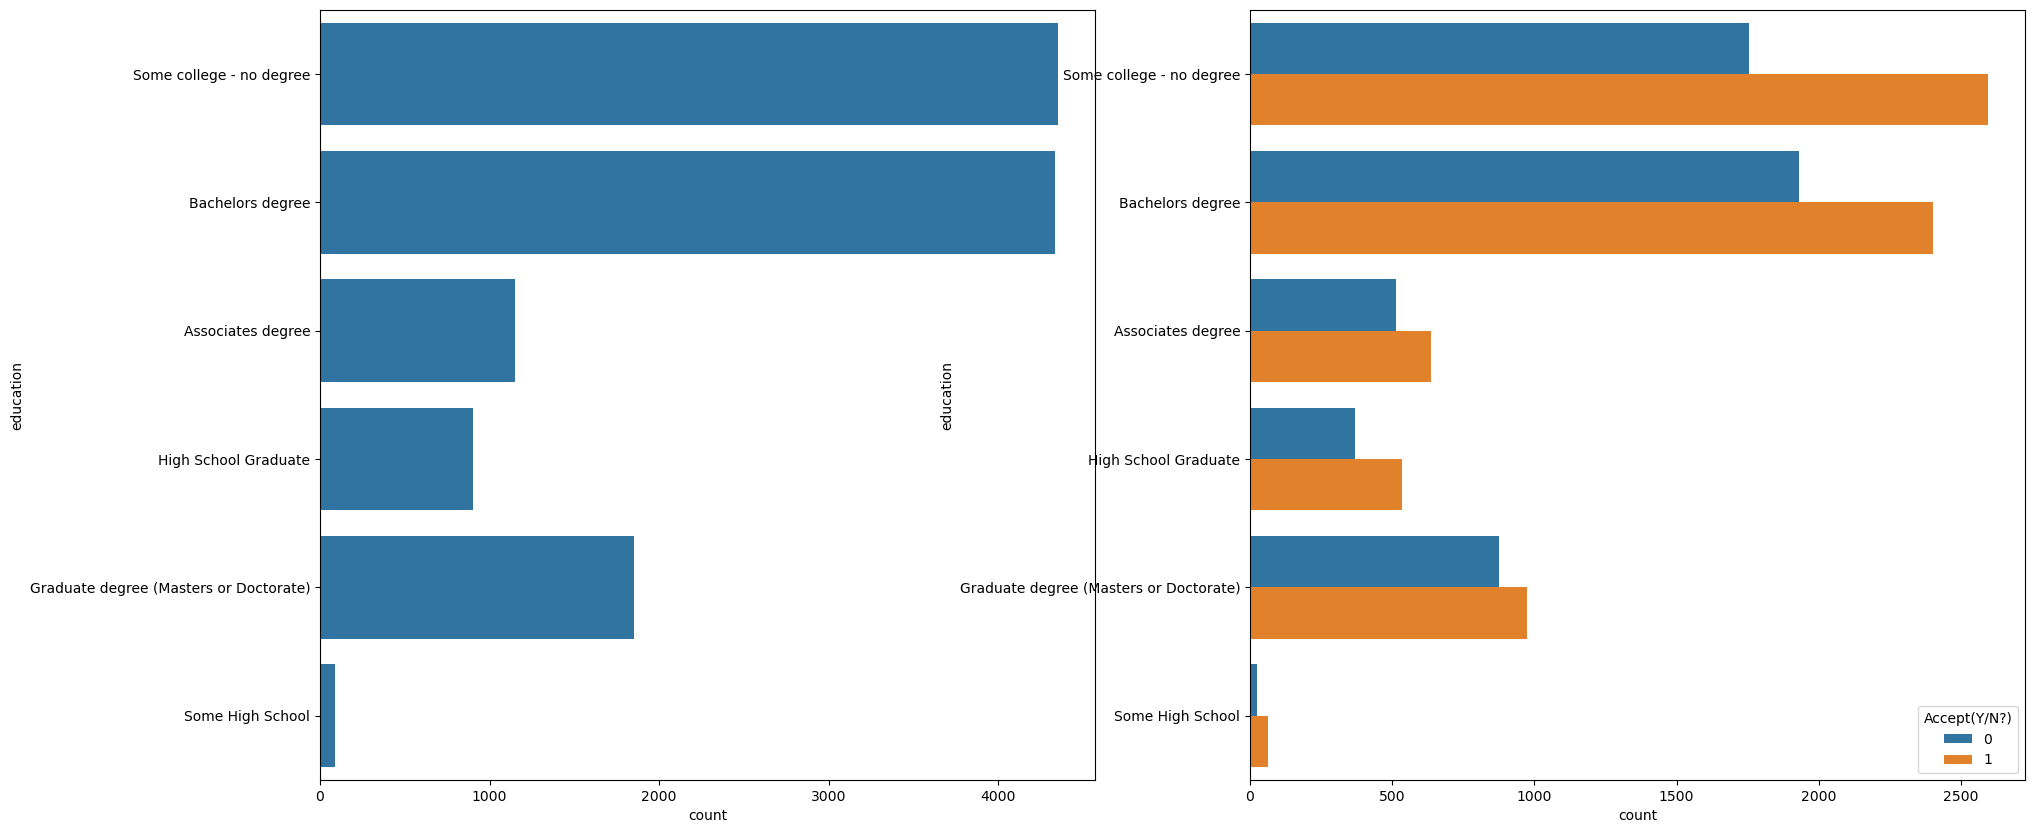

******************************************************************************************************************************************************
occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
                                             ... 
Construction & Extraction                     154
Installation Maintenance & Repair             133
Production Occupations                        110
Building & Grounds Cleaning & Maintenance      44
Farming Fishing & Forestry                     43
Name: count, Length: 25, dtype: int64


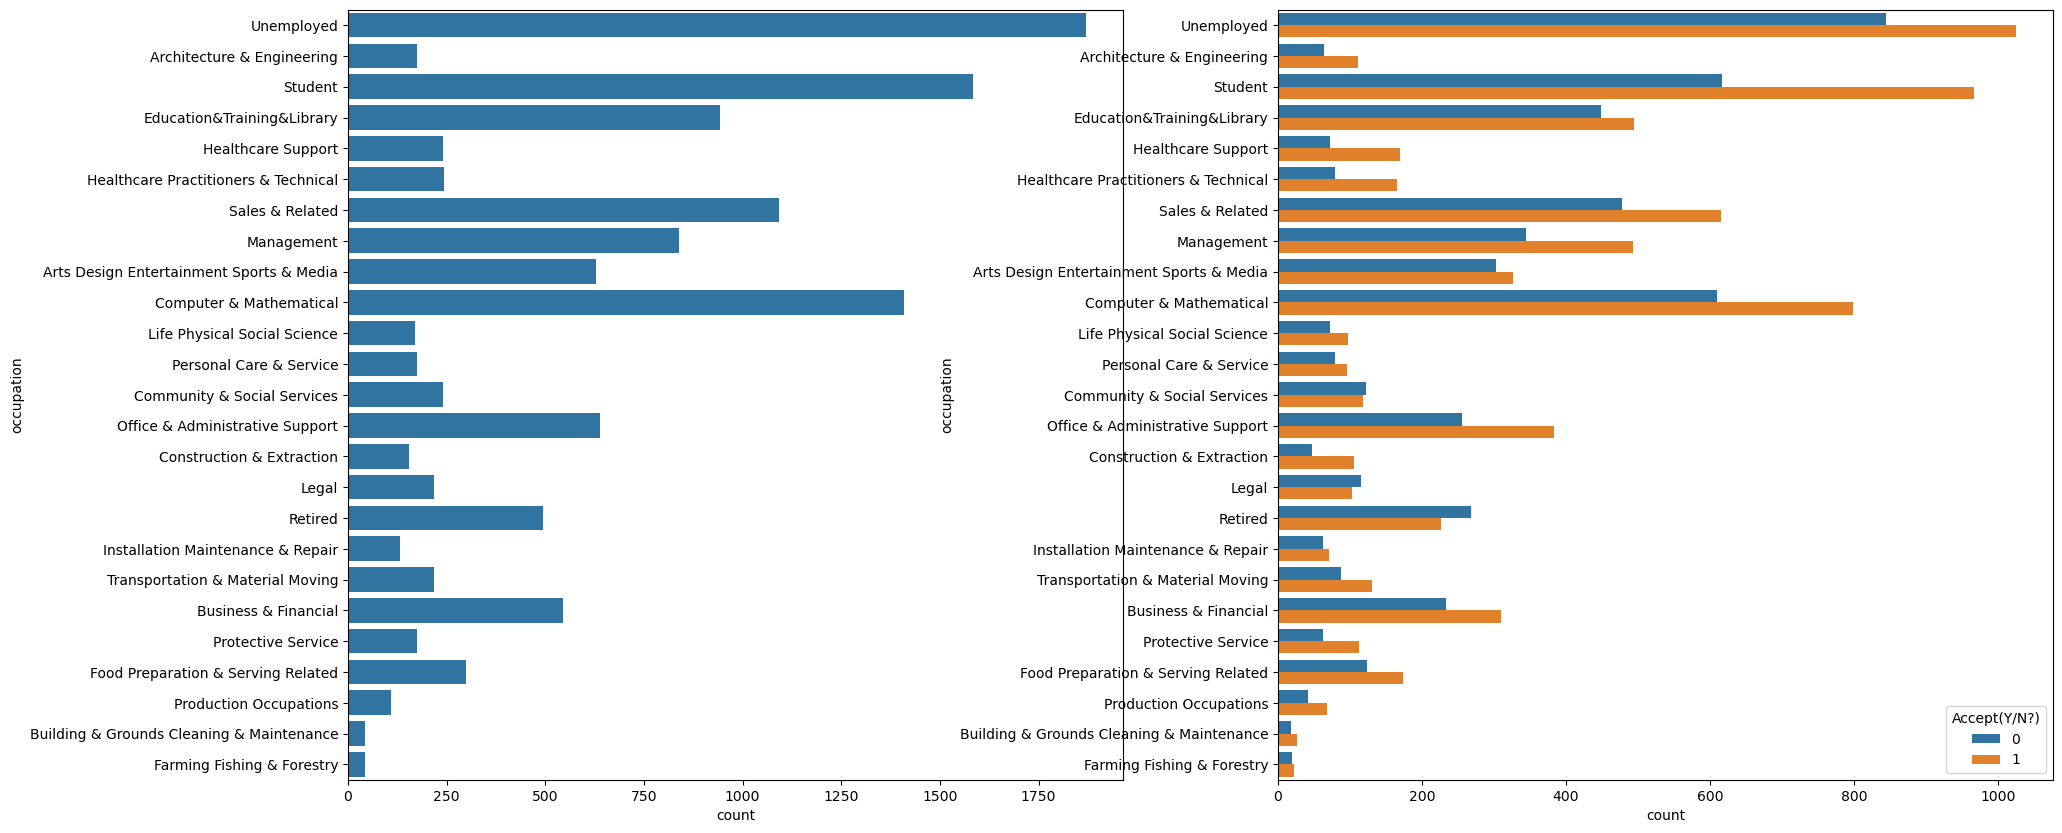

******************************************************************************************************************************************************
income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64


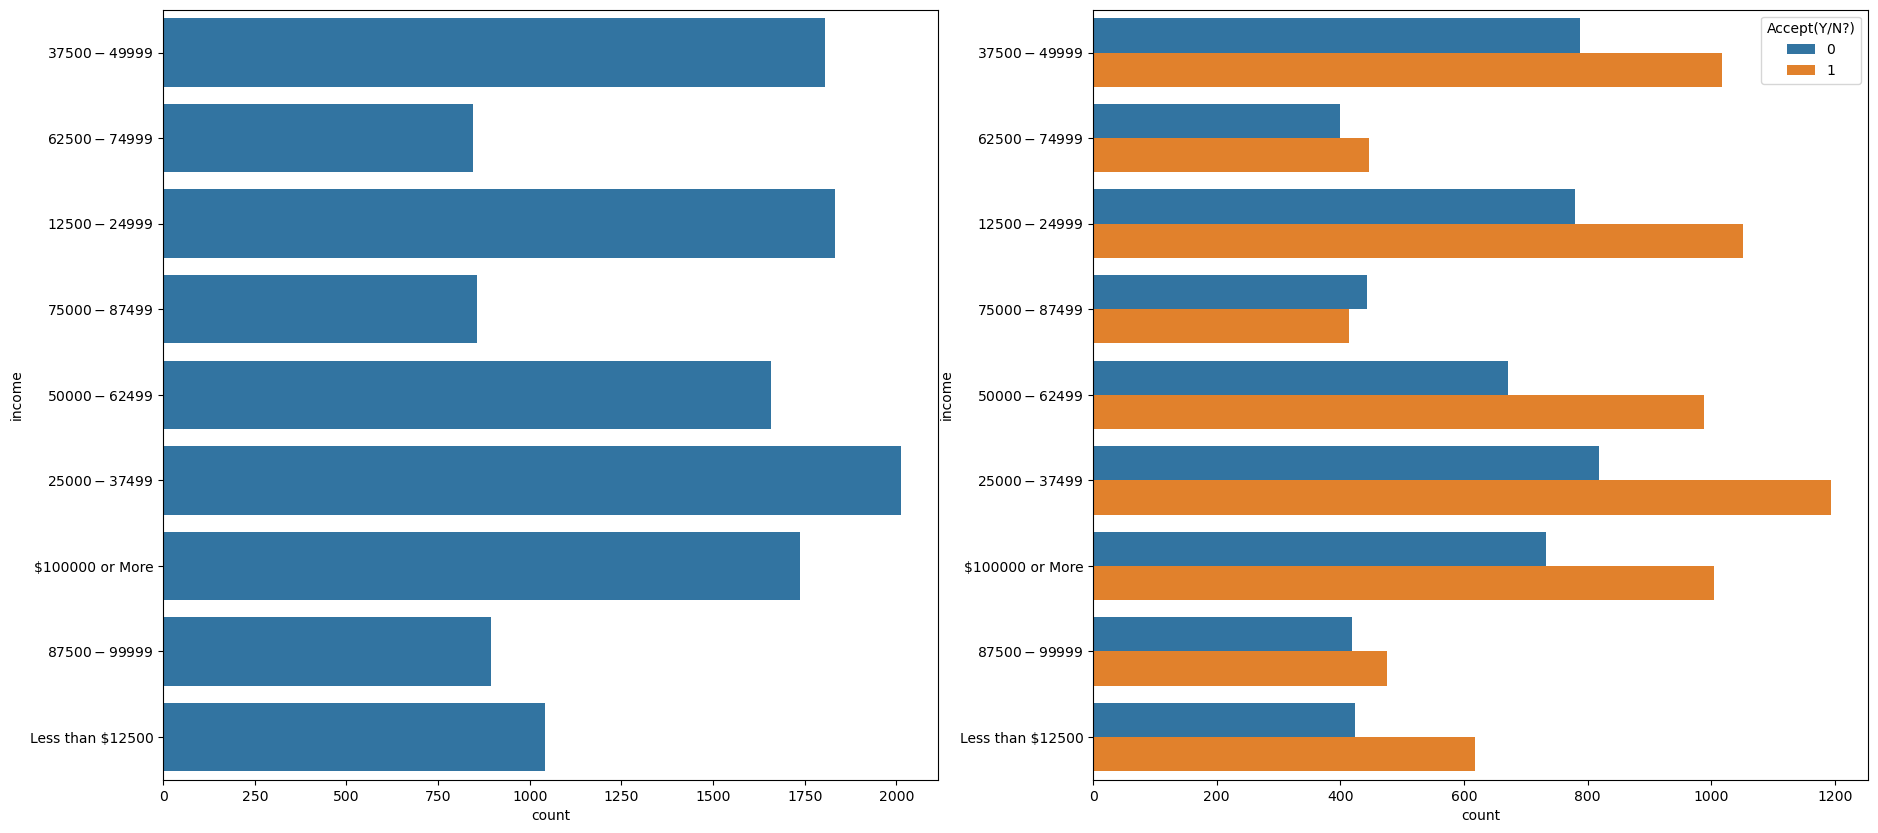

******************************************************************************************************************************************************
Bar
never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64


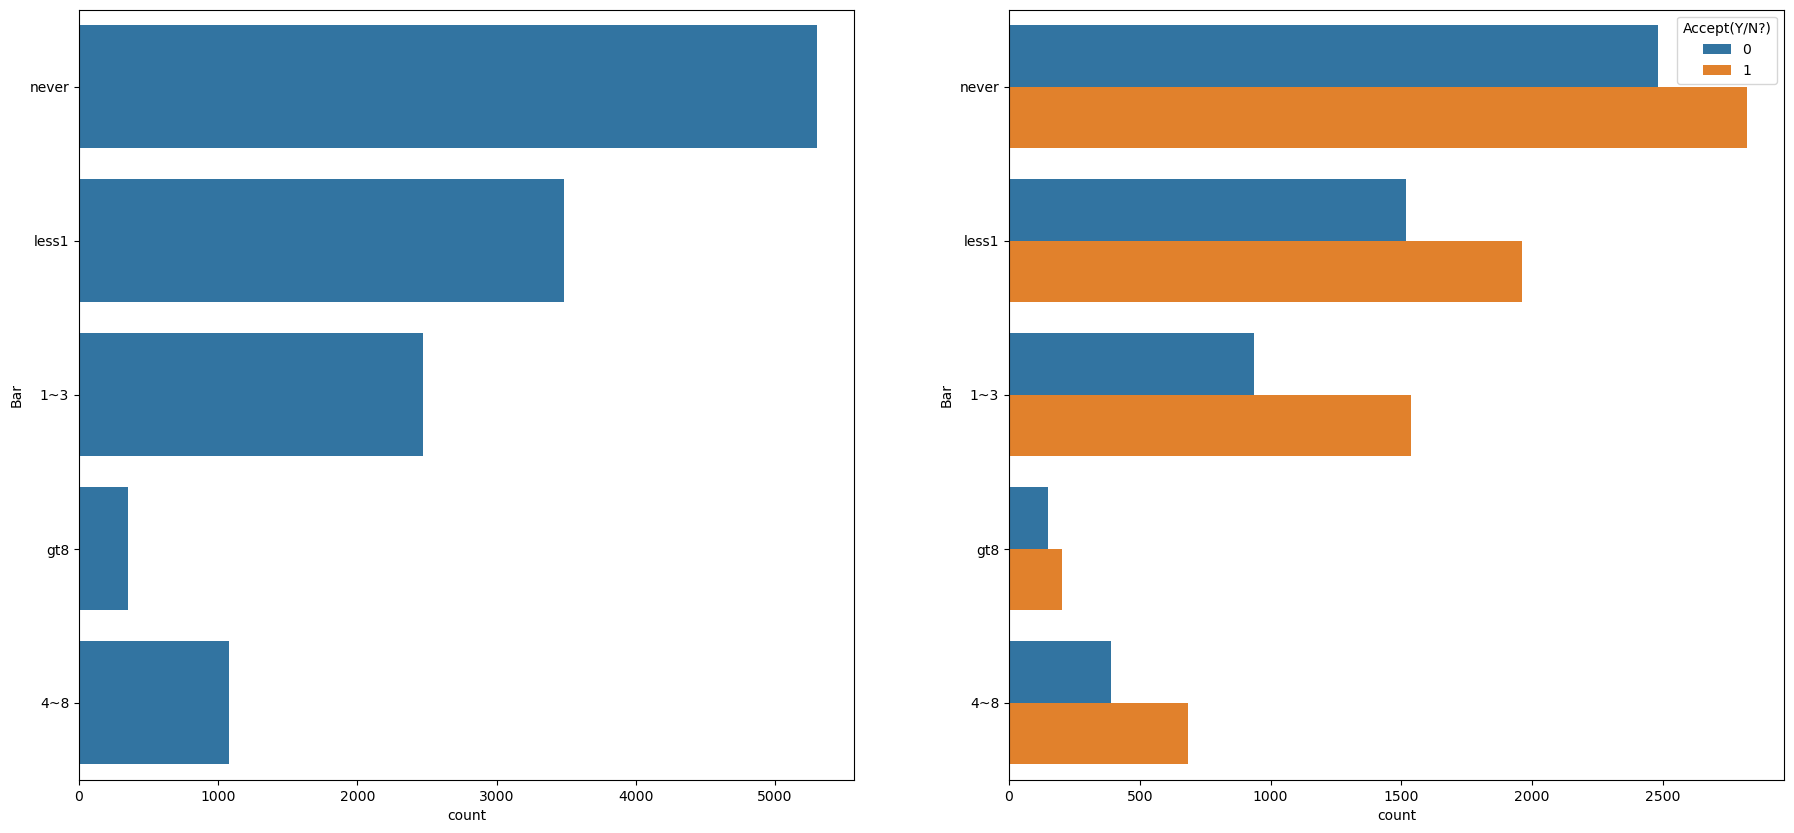

******************************************************************************************************************************************************
CoffeeHouse
less1    3602
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


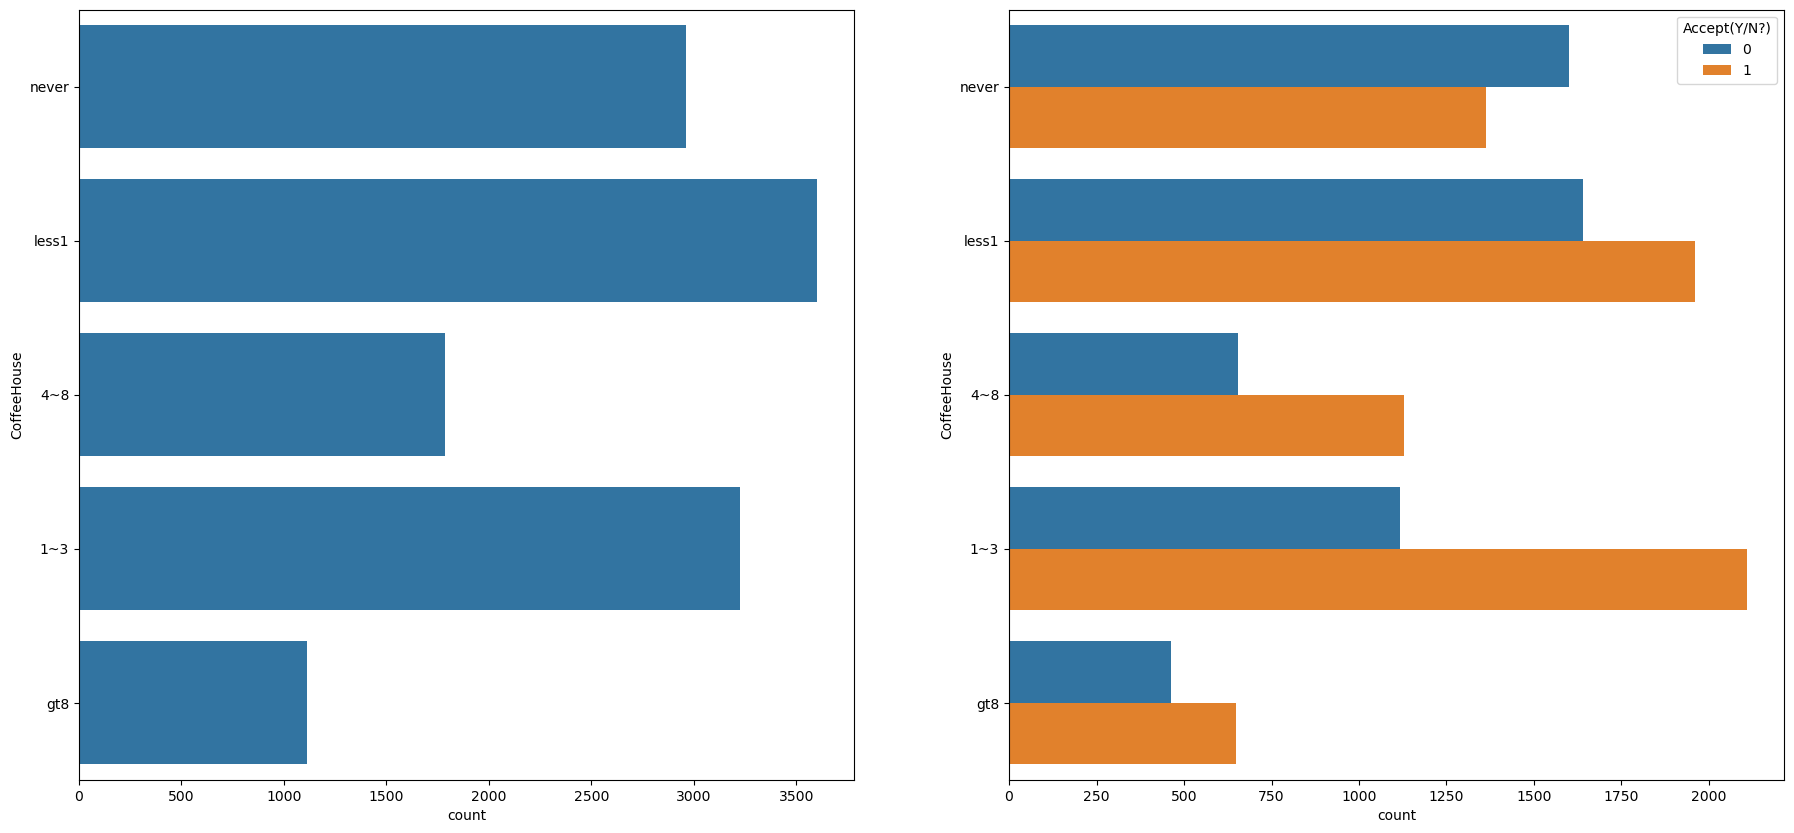

******************************************************************************************************************************************************
CarryAway
1~3      4823
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64


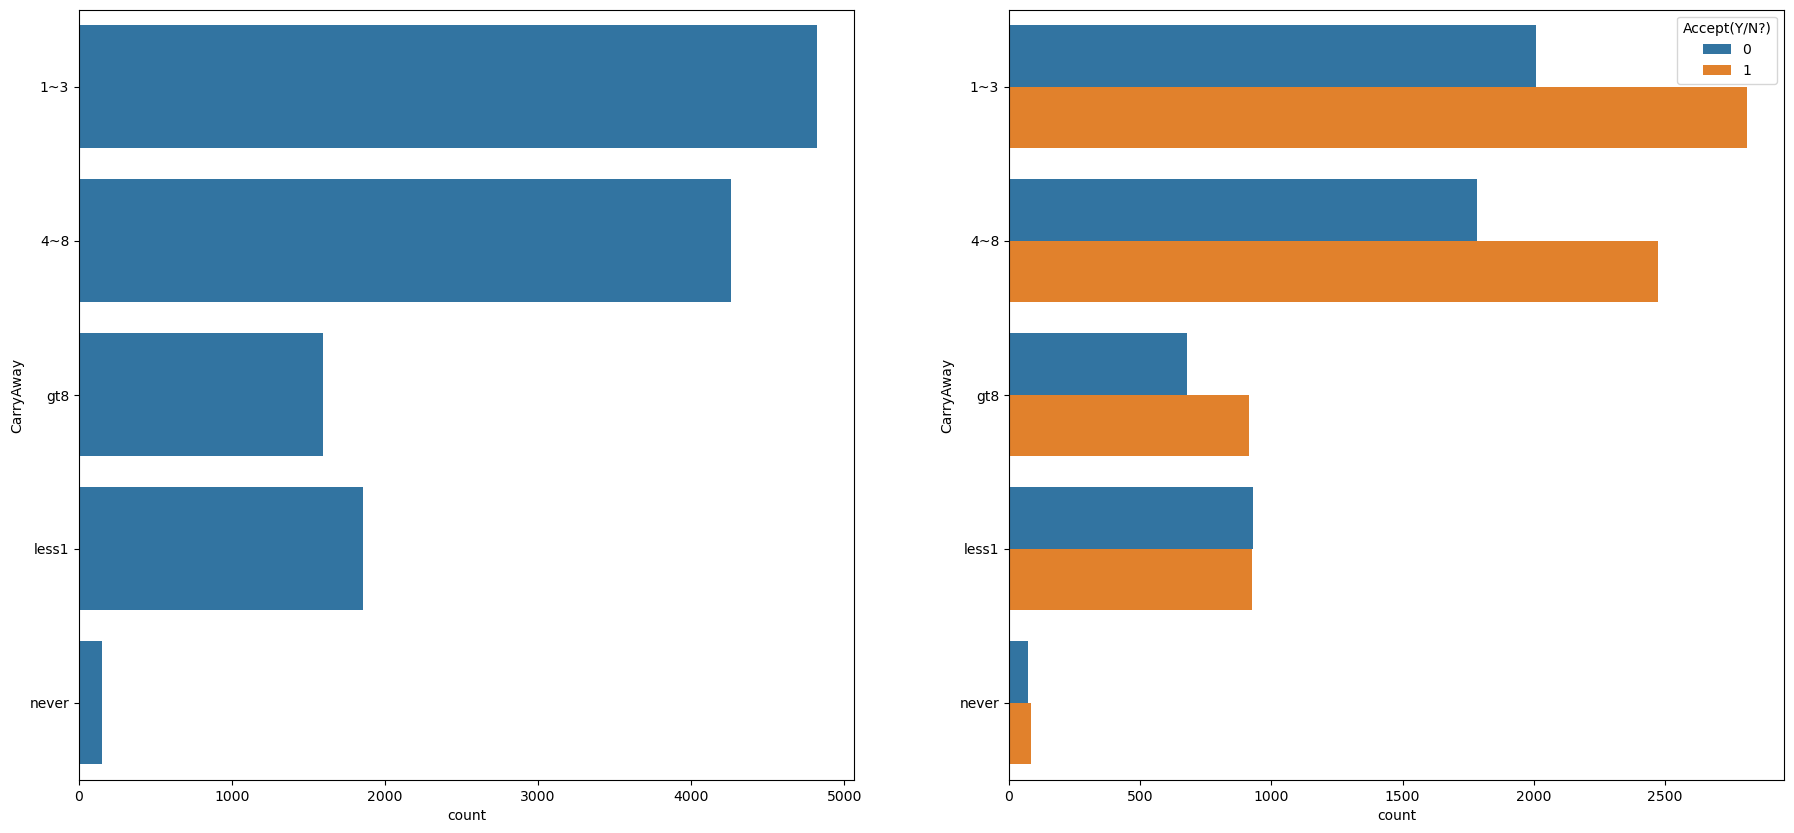

******************************************************************************************************************************************************
RestaurantLessThan20
1~3      5506
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64


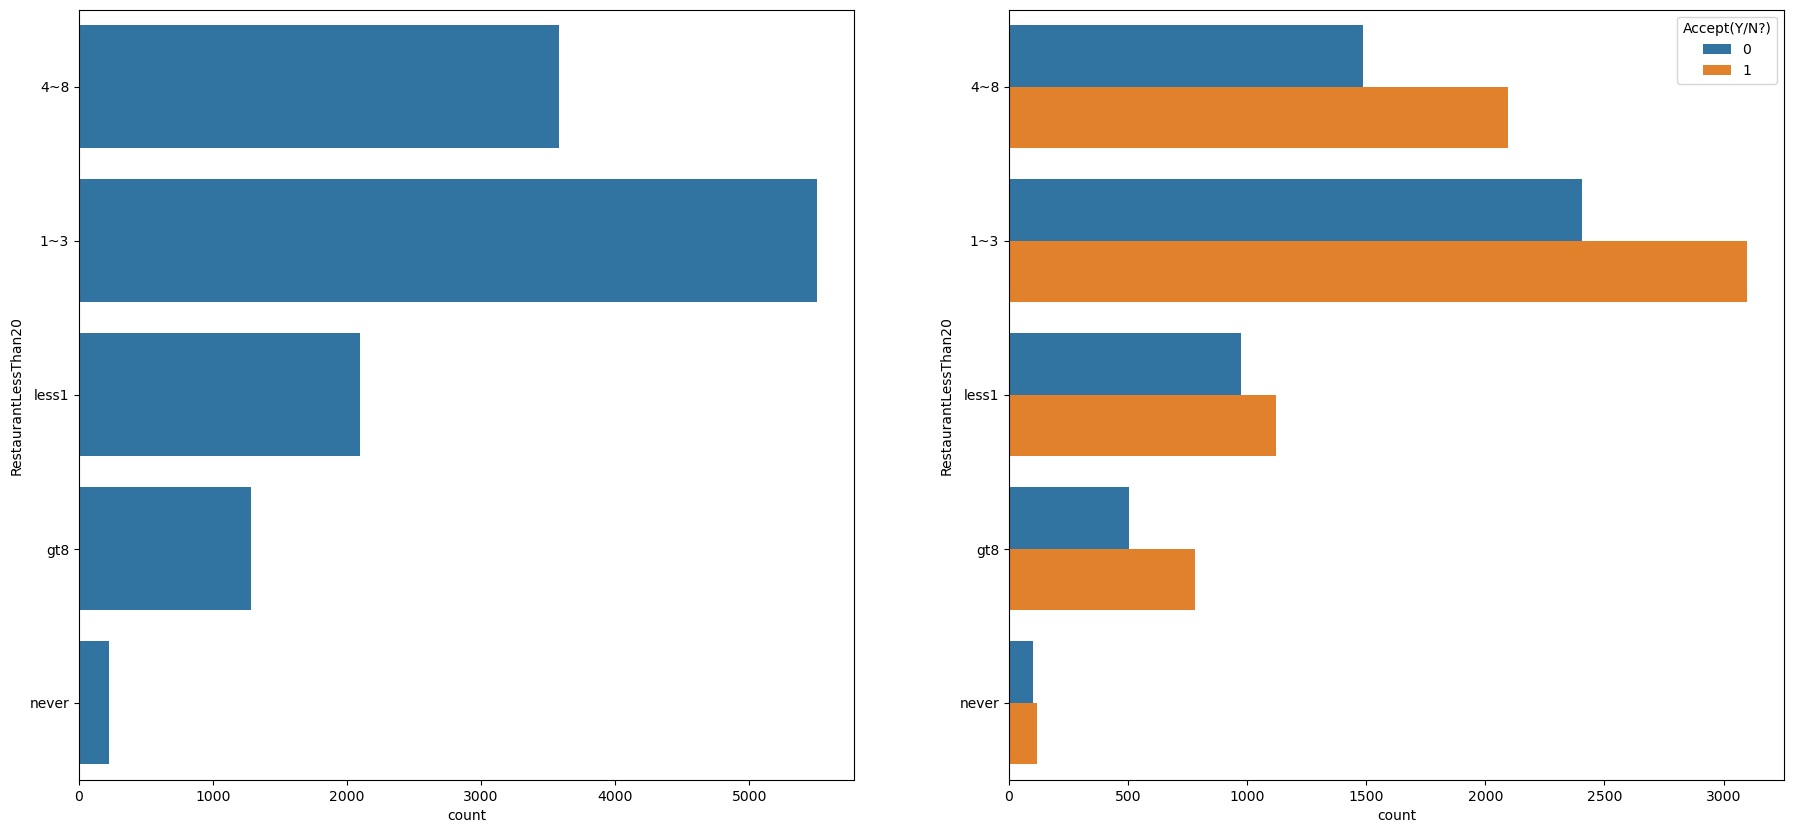

******************************************************************************************************************************************************
Restaurant20To50
less1    6266
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


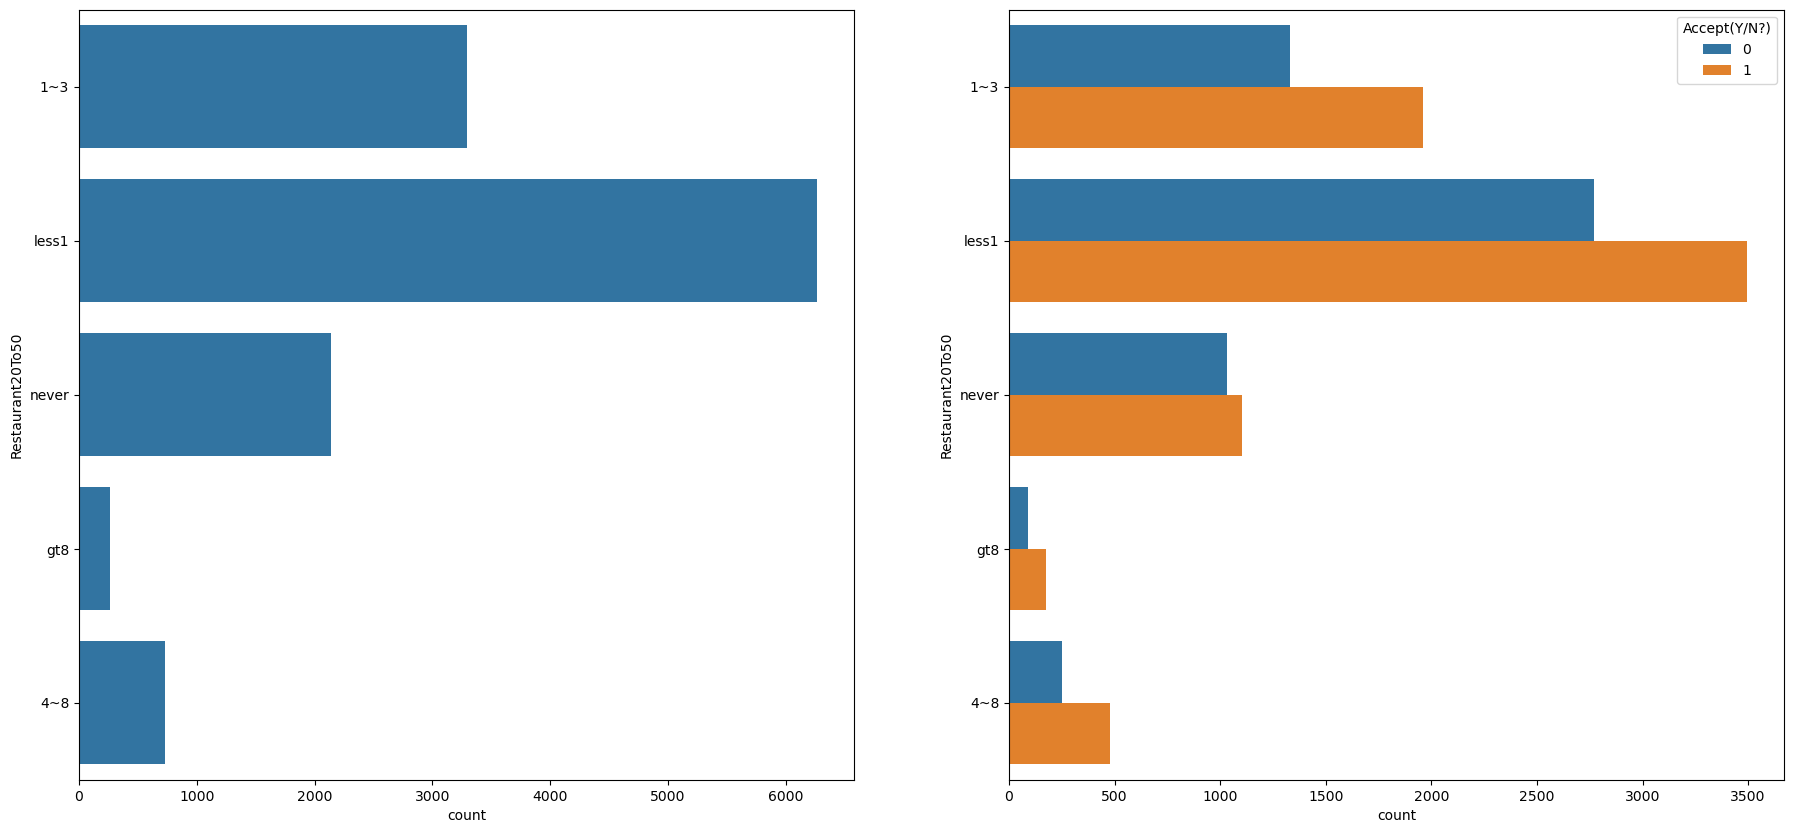

******************************************************************************************************************************************************
toCoupon_GEQ5min
1    12684
Name: count, dtype: int64


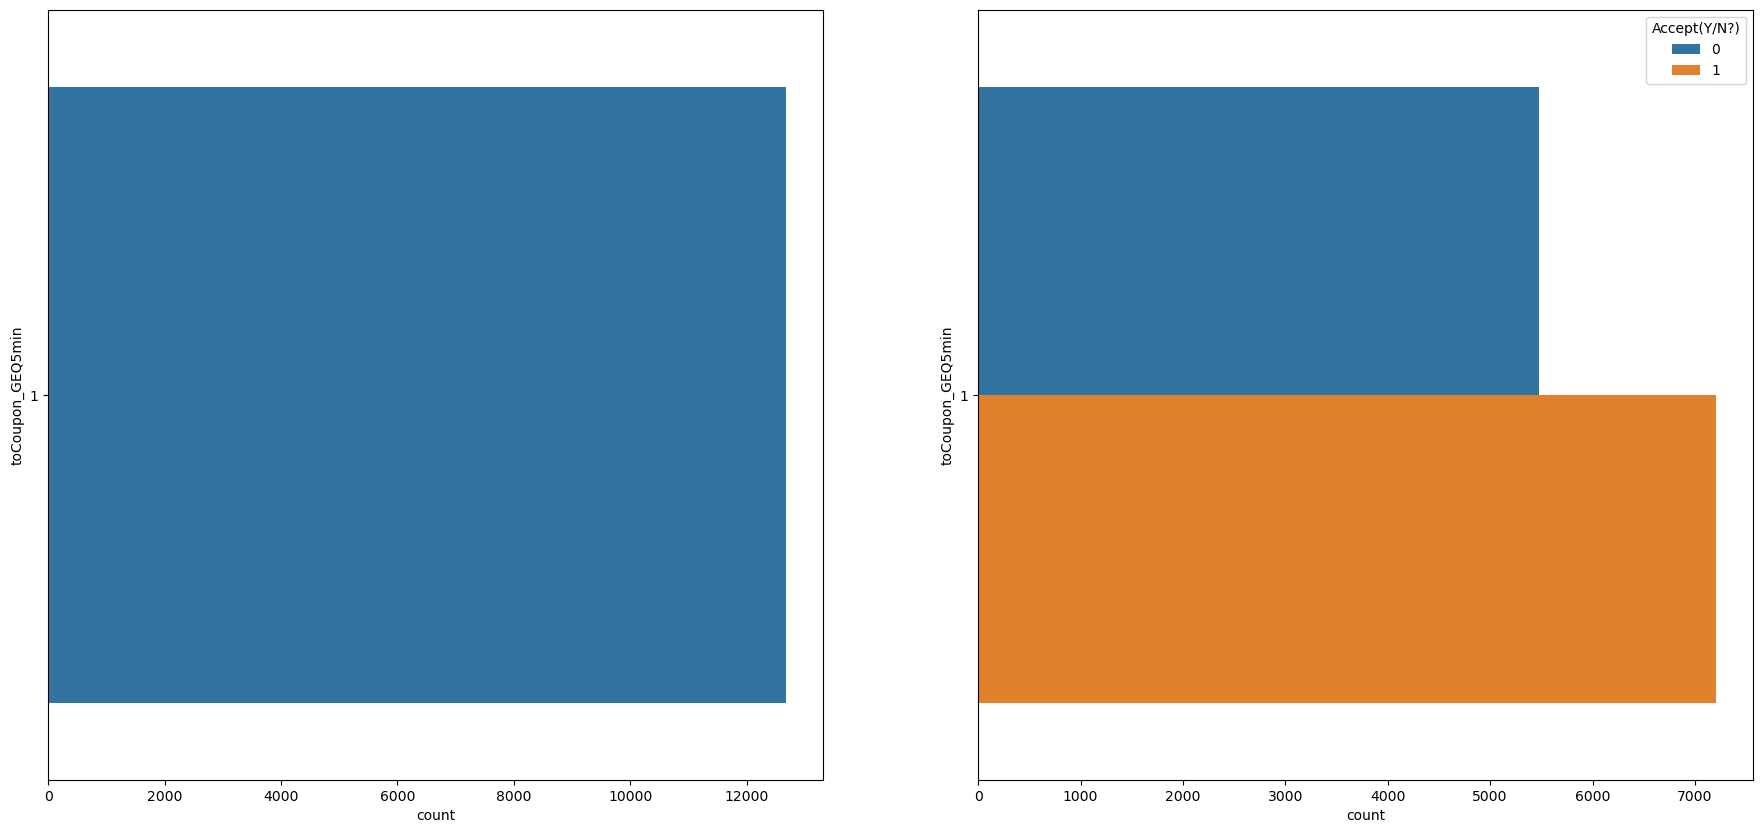

******************************************************************************************************************************************************
toCoupon_GEQ15min
1    7122
0    5562
Name: count, dtype: int64


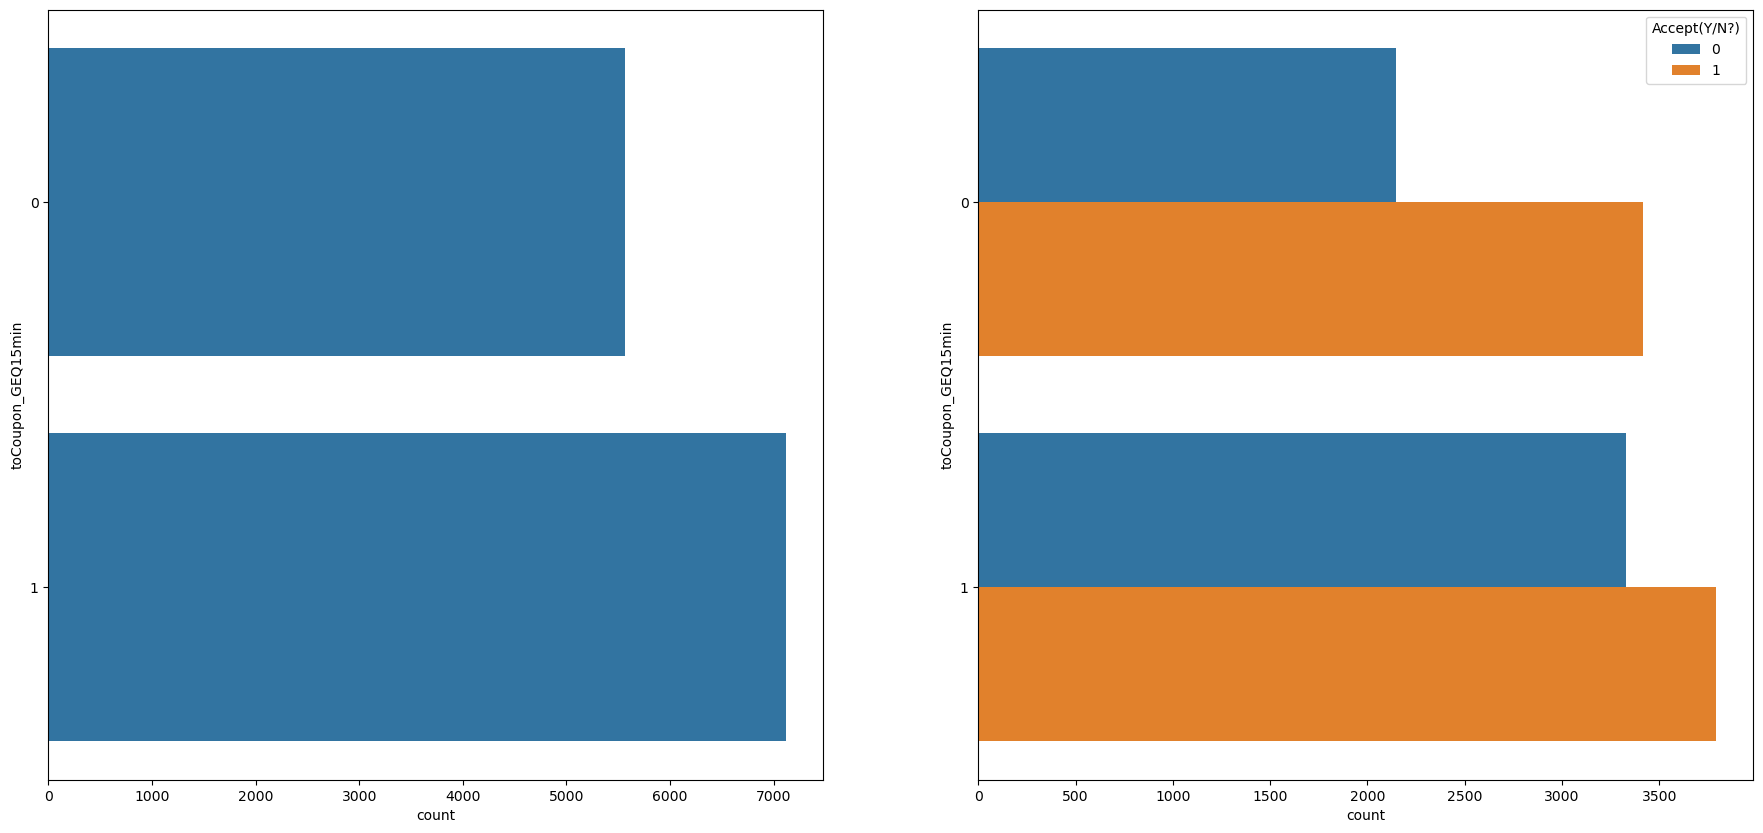

******************************************************************************************************************************************************
toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64


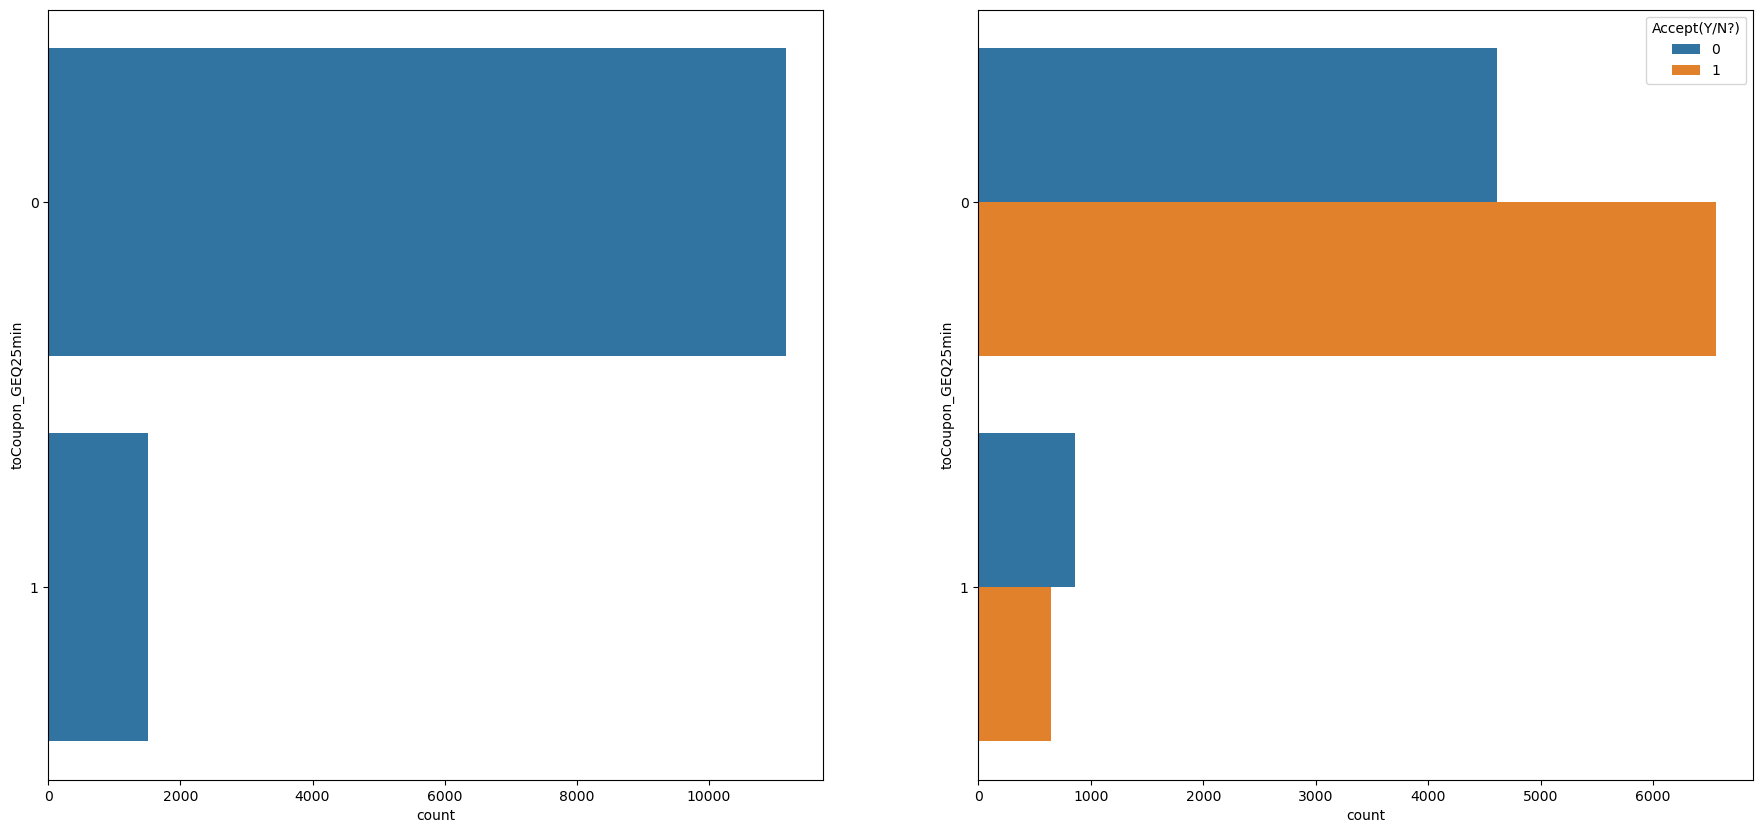

******************************************************************************************************************************************************
direction_same
0    9960
1    2724
Name: count, dtype: int64


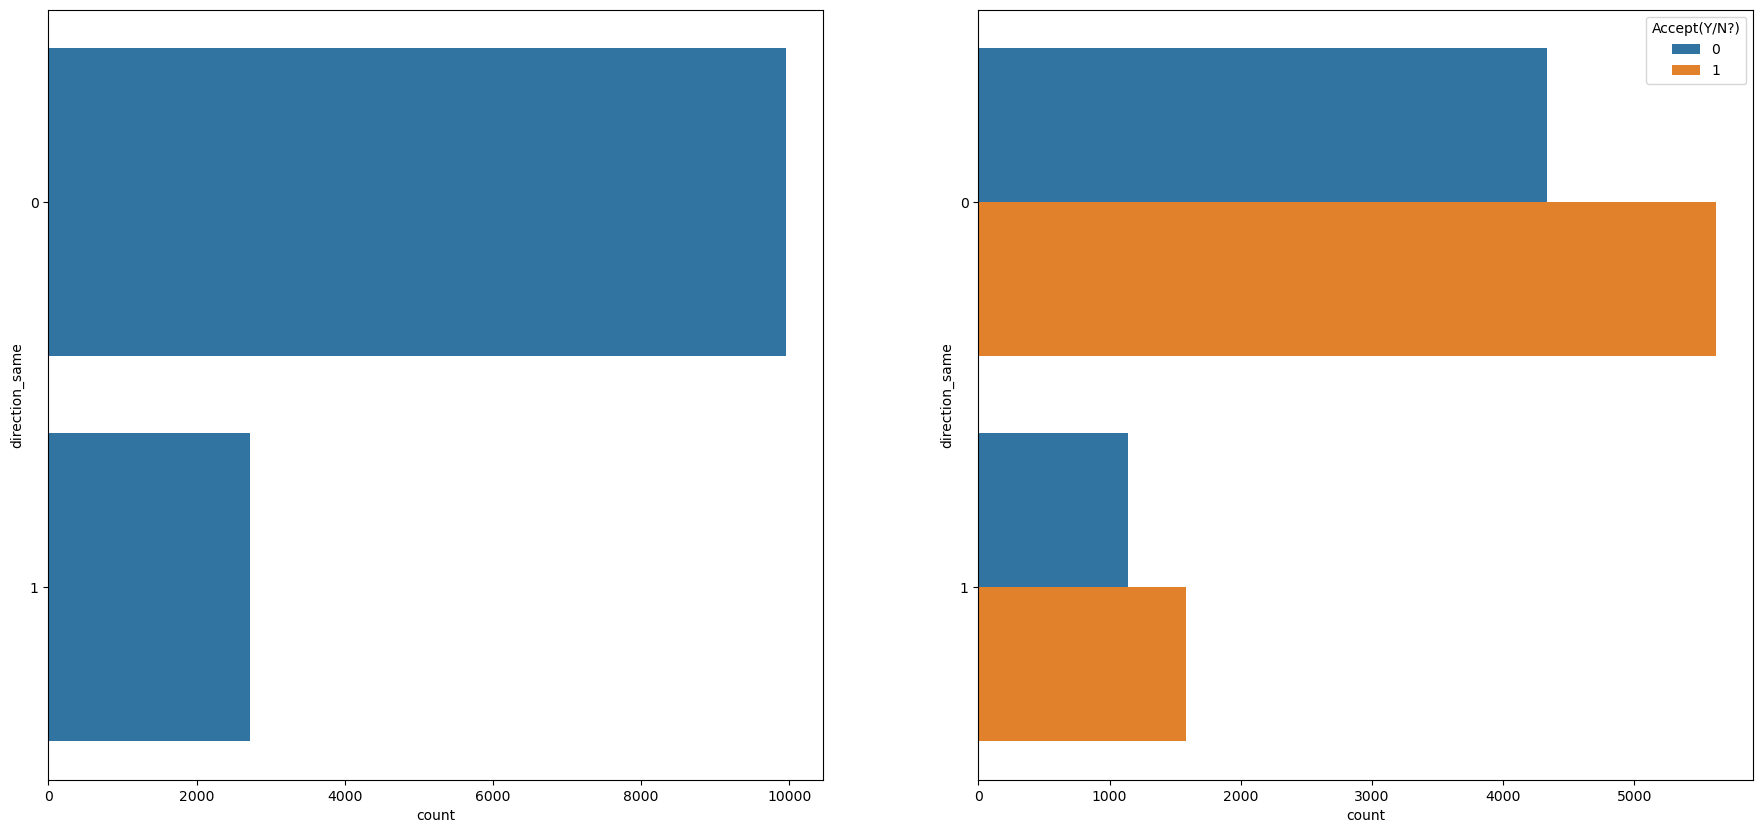

******************************************************************************************************************************************************
direction_opp
1    9960
0    2724
Name: count, dtype: int64


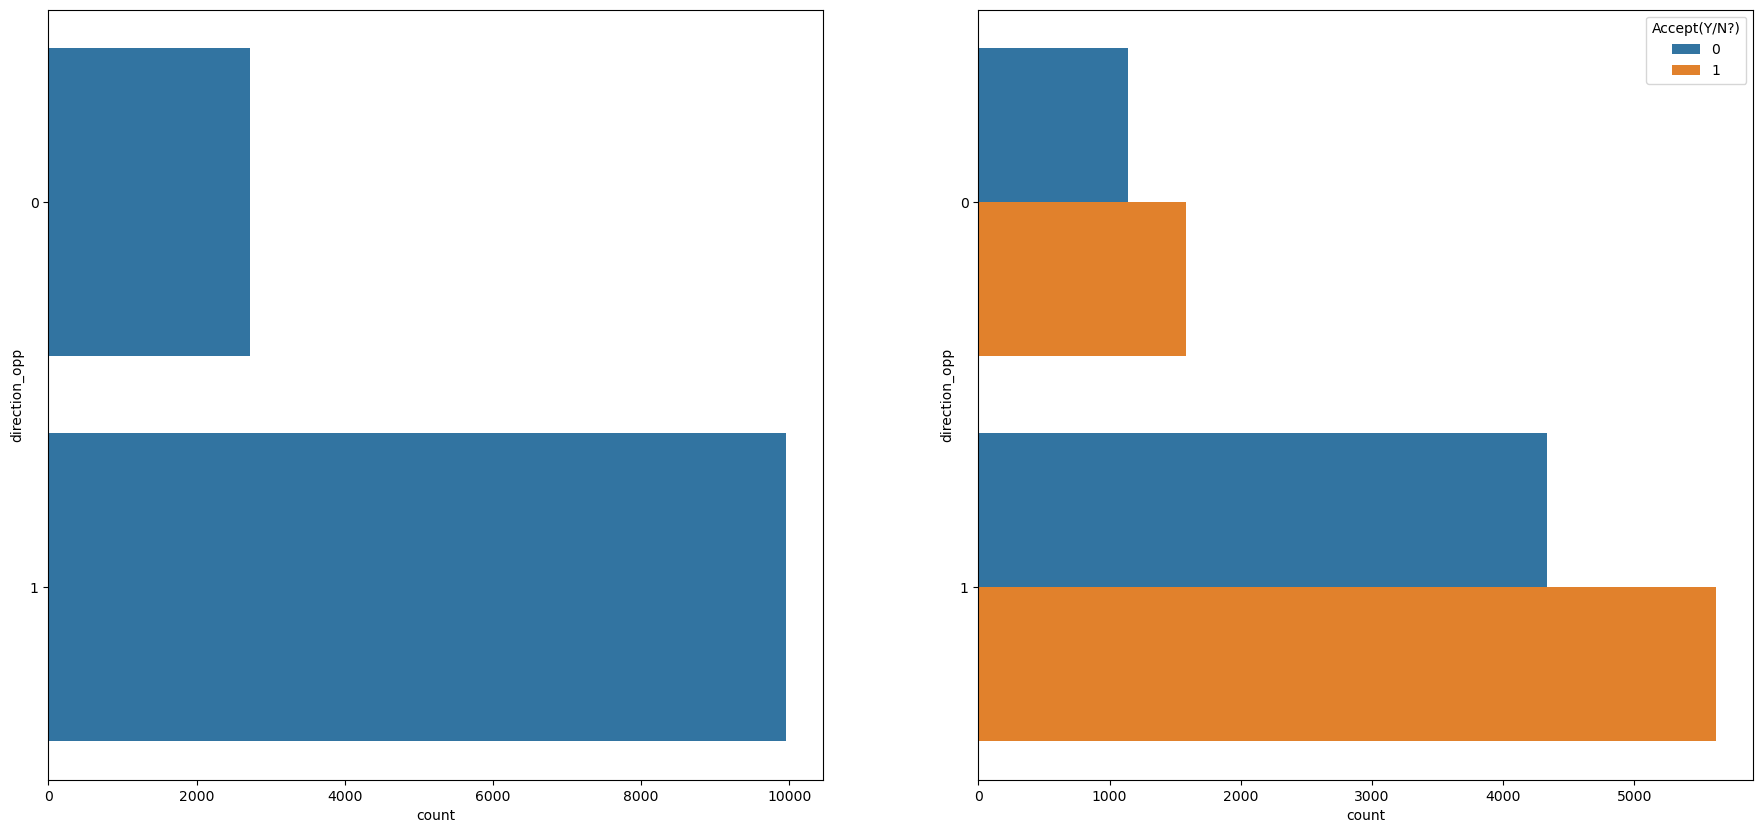

******************************************************************************************************************************************************
Accept(Y/N?)
1    7210
0    5474
Name: count, dtype: int64


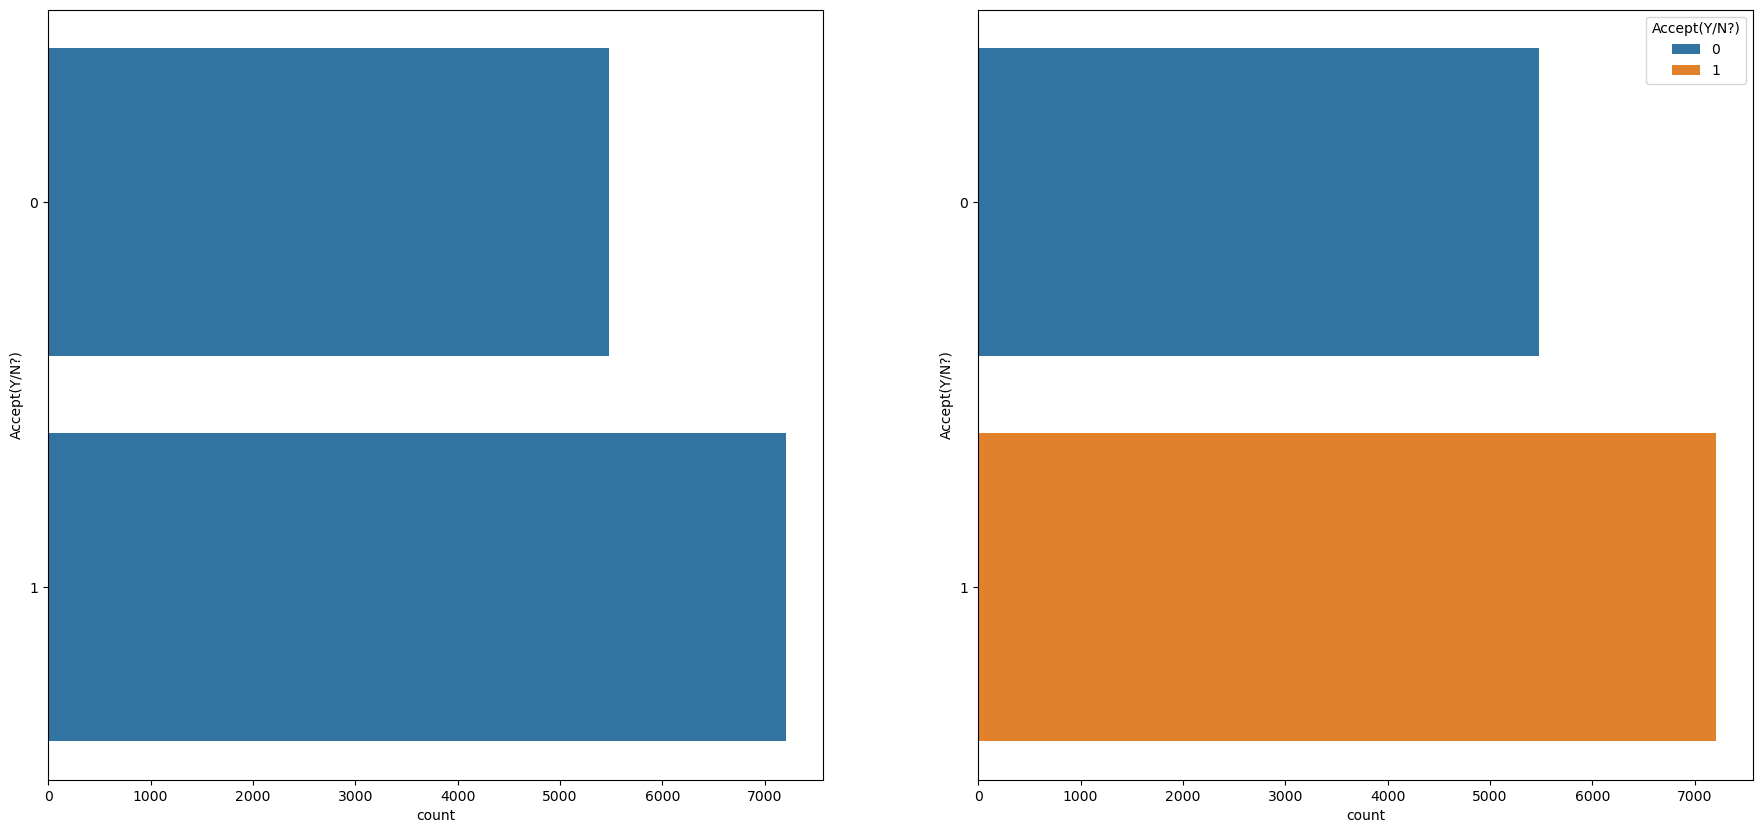

In [43]:
pd.set_option('display.max_rows' , 20)
for i in df_copy:
    print(150 * '*')
    print(df_copy[i].value_counts())

    plt.figure(figsize=(22,10))
    plt.subplot(1,2,1)
    sns.countplot(y=i,data=df_copy)
    plt.subplot(1,2,2)
    sns.countplot(y=i, data = df_copy , hue='Accept(Y/N?)')
    plt.show()

### Conclusion drawn from the plots above

####  Most of the customers traveling have no urgent places to go

#### Most of the customers are traveling alone

#### Customers prefer traveling on sunny days.

#### Most people prefer traveling on sunny days, the temperature is likely to be higher. 
  
#### The majority of distributed coupons are for coffee houses, followed by restaurants, with an average spending of less than $20. 

#### Most coupons expires within 1 day.
#### While most customers are female passengers, coupon acceptance rates are higher among male passengers.
#### The majority of customers belong to the age group of 21 to 36, which also shows the highest coupon acceptance rate.
#### Most customers are married.
#### Most customers do not have children.
#### Most number of customers do not hold any degree but have completed their college.
#### A significant portion of customers are unemployed, which aligns with their tendency to travel to locations other than work. 
#### Income range for majority of the customers are $ 25000 - $37499.
#### Majority of people never visited bar.
#### Customers have visited the coffeehouse 1-3 times in a month.
#### The majority of customers prefer taking parcels, indicating a demand for convenience and takeaway options.

#### Most people have visited restaurant where average spent is less than 20 for almost 1 to 3 times every month.

#### People are visiting less than 1 time for the restaurants of average spent of 20 to 50 per month.

In [44]:
df_copy.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Accept(Y/N?)'], dtype='object')

In [45]:
def show(column):
    pd.set_option('display.max_rows' , 25)
    report=pd.DataFrame(df_copy.groupby(column)['Accept(Y/N?)'].count())
    report['accepted']=df_copy[df_copy['Accept(Y/N?)']==1].groupby(column)['Accept(Y/N?)'].count()
    report['rejected']=df_copy[df_copy['Accept(Y/N?)']==0].groupby(column)['Accept(Y/N?)'].count()
    report['Accepated %']=((report['accepted']) / (report['Accept(Y/N?)']))*100
    report['Rejected %']=((report['rejected']) / (report['Accept(Y/N?)']))*100

    plt.figure(figsize=(8,6))
    sns.countplot(x=column , hue='Accept(Y/N?)',data=df_copy)
    plt.show()
    return report

### Analyzing each feature and deriving meaningful conclusions.

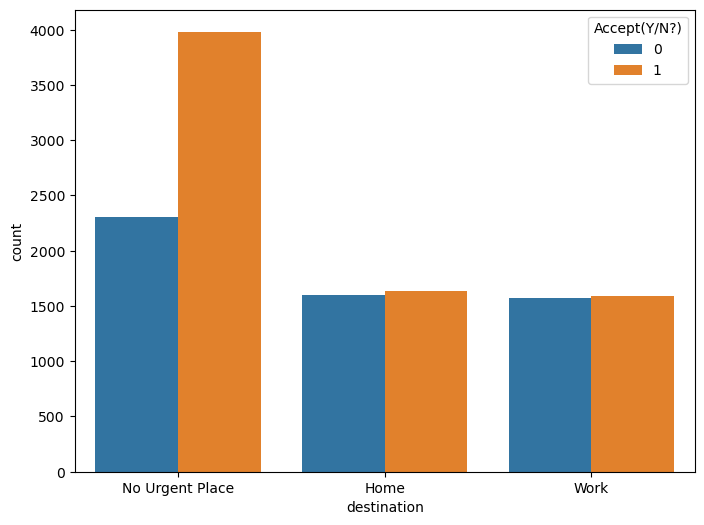

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


In [46]:
show('destination')

We can see that there is  63% of acceptance rate from customers that have no urgent place to go.

Home and Word Destinations have almost similar acceptance rate.

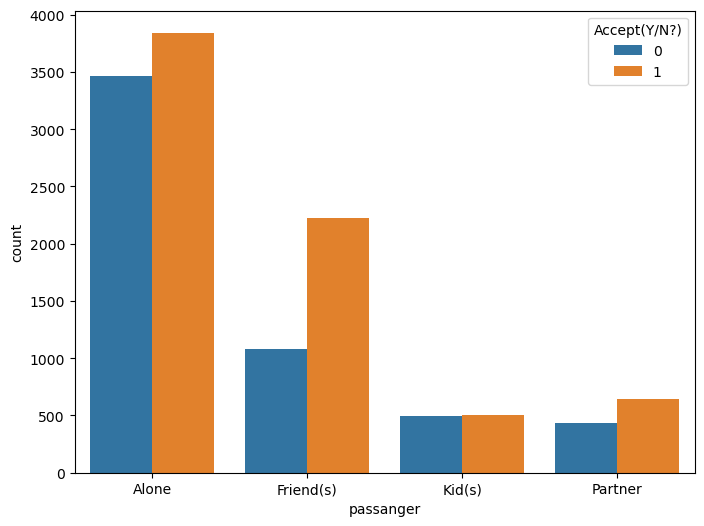

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
passanger,,,,,
Alone,7305,3841,3464,52.580424,47.419576
Friend(s),3298,2221,1077,67.343845,32.656155
Kid(s),1006,508,498,50.497018,49.502982
Partner,1075,640,435,59.534884,40.465116


In [47]:
show('passanger')

Most of the customer are traveling alone.

Customers travling with friends has of acceptance rate 67% making them highest.

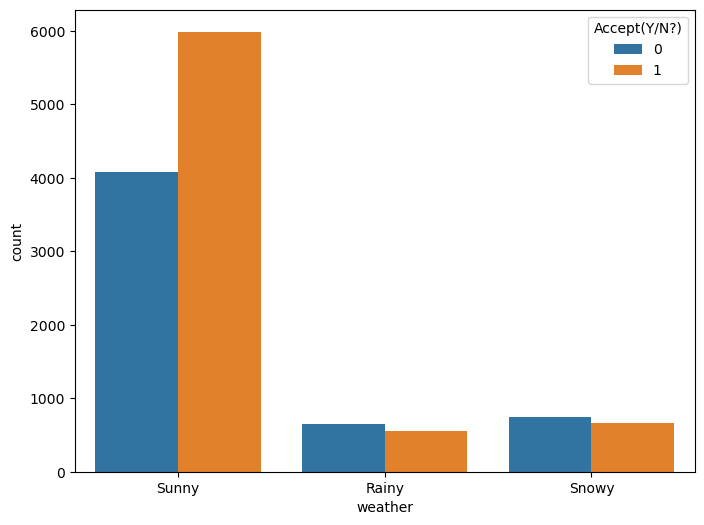

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
weather,,,,,
Rainy,1210,560,650,46.280992,53.719008
Snowy,1405,661,744,47.046263,52.953737
Sunny,10069,5989,4080,59.479591,40.520409


In [48]:
show('weather')

High amount of customer can be seen in the Sunny weather.

Additionally, the acceptance rate is notably high in sunny conditions, reaching 59%.

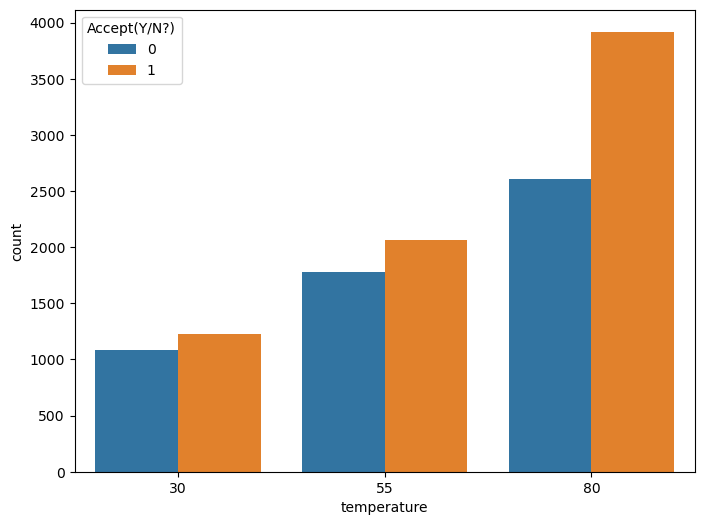

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
temperature,,,,,
30,2316,1230,1086,53.108808,46.891192
55,3840,2061,1779,53.671875,46.328125
80,6528,3919,2609,60.033701,39.966299


In [49]:
show('temperature')

The majority of customers visit during sunny conditions when the temperature is 80°F, resulting in a 60% acceptance rate.

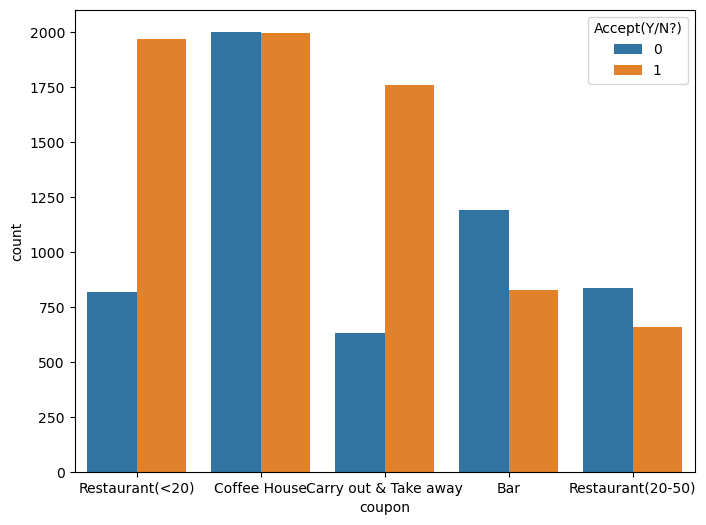

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
coupon,,,,,
Bar,2017,827,1190,41.001487,58.998513
Carry out & Take away,2393,1760,633,73.547848,26.452152
Coffee House,3996,1995,2001,49.924925,50.075075
Restaurant(20-50),1492,658,834,44.101877,55.898123
Restaurant(<20),2786,1970,816,70.710696,29.289304


In [50]:
show('coupon')

We can see that high number of coupons are given by Coffee House - 3996.

But the acceptance rate is high for Carry out & Take away - 73%

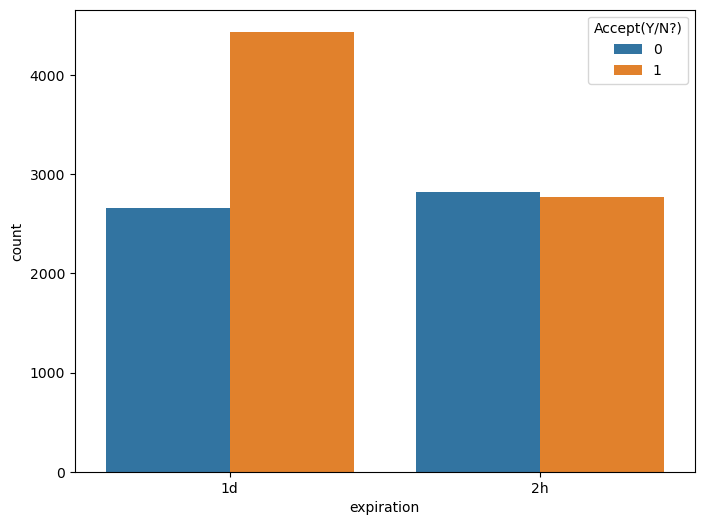

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
expiration,,,,,
1d,7091,4436,2655,62.558172,37.441828
2h,5593,2774,2819,49.597711,50.402289


In [51]:
show('expiration')

Most coupons has expiration of 1 day.

62% of coupons are accepted that has expiration of 1 day

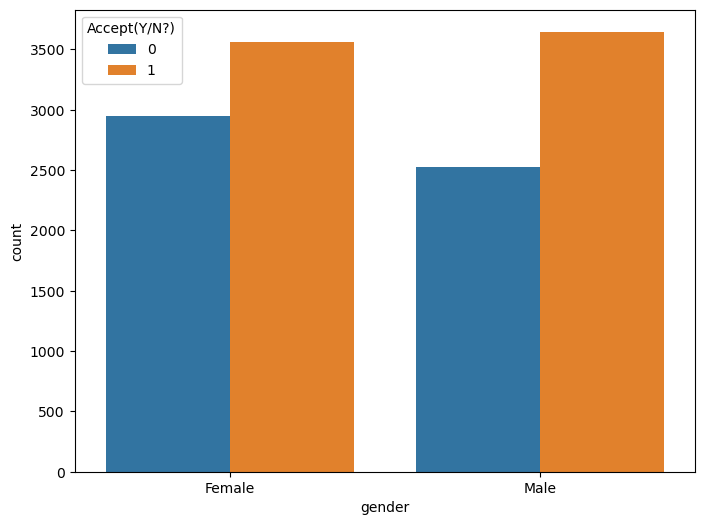

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
gender,,,,,
Female,6511,3563,2948,54.722777,45.277223
Male,6173,3647,2526,59.079864,40.920136


In [52]:
show('gender')

Female customers are observed more frequently compared to males; however, their acceptance rate is slightly lower than that of male customers.

Female-54%

Male - 59%



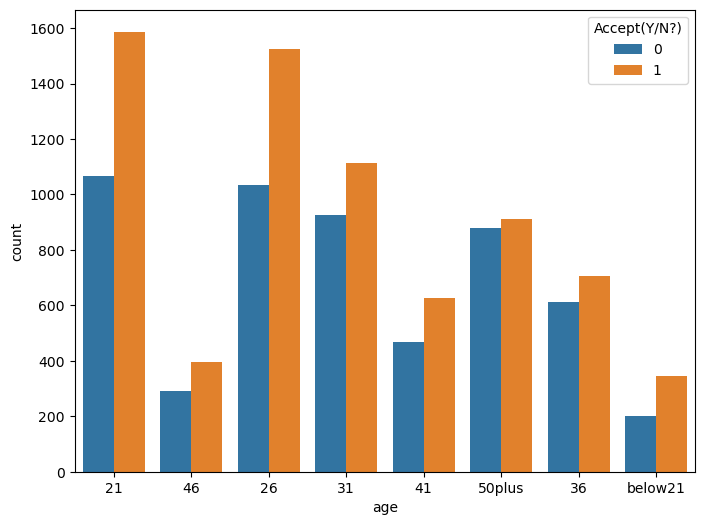

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
age,,,,,
21,2653,1587,1066,59.819073,40.180927
26,2559,1525,1034,59.593591,40.406409
31,2039,1114,925,54.634625,45.365375
36,1319,706,613,53.525398,46.474602
41,1093,626,467,57.273559,42.726441
46,686,395,291,57.580175,42.419825
50plus,1788,910,878,50.894855,49.105145
below21,547,347,200,63.436929,36.563071


In [53]:
show('age')

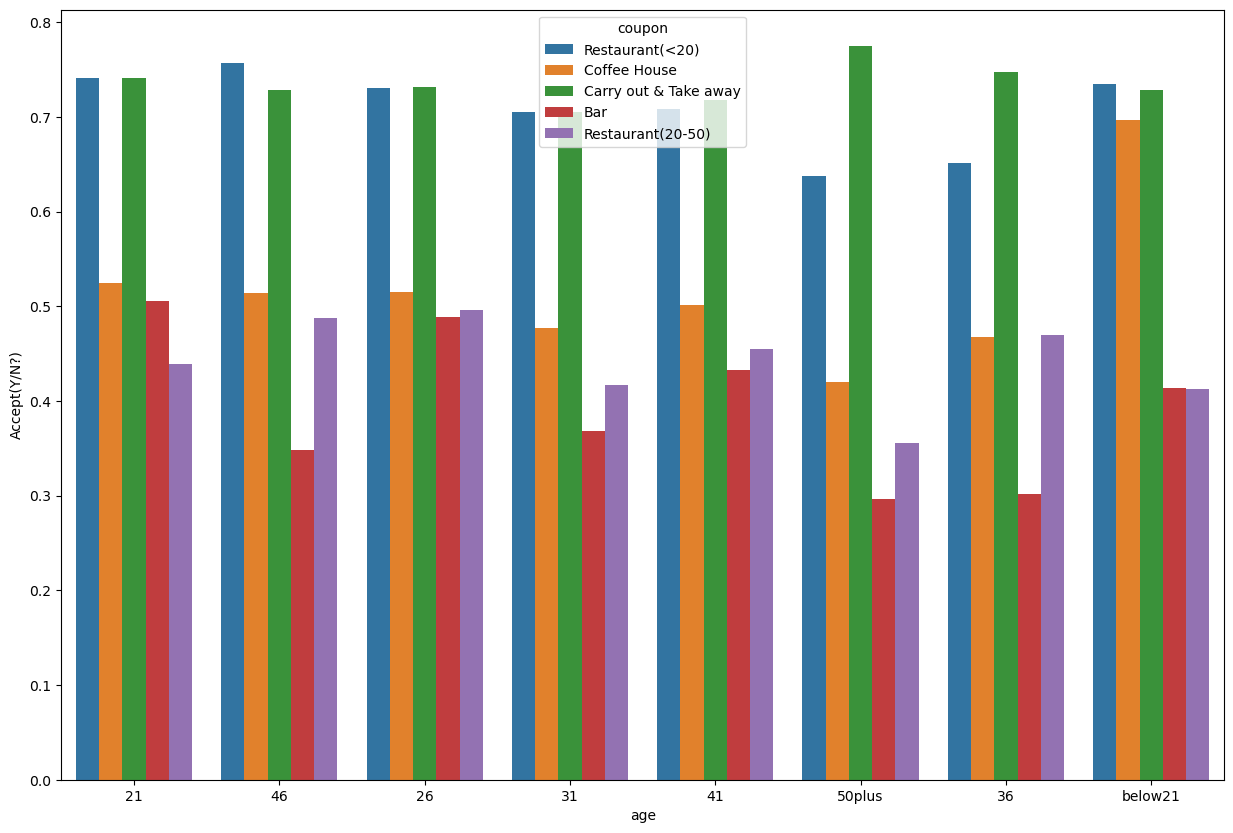

In [54]:
plt.figure(figsize = (15 , 10))
sns.barplot(x='age',y='Accept(Y/N?)',hue='coupon',data=df_copy,errorbar=None)
plt.show()

From the above plot:

- Group age of 21 and below 21 has the most amount of acceptance rate.
- Almost all the ages of customers accept the coupons from Restaurant(<20) and Carrt out & Take away.
- Coffee House coupons are mostly accepted by age group of below 21.
- The Bar coupon is mostly accepted by age group of 21-26.
- Bar coupon is least accepted by age group of 50plus.

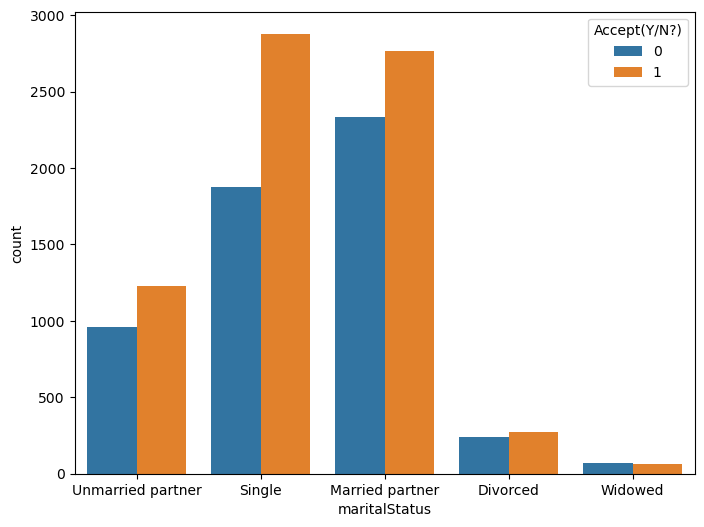

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
maritalStatus,,,,,
Divorced,516,273,243,52.906977,47.093023
Married partner,5100,2769,2331,54.294118,45.705882
Single,4752,2879,1873,60.585017,39.414983
Unmarried partner,2186,1227,959,56.129918,43.870082
Widowed,130,62,68,47.692308,52.307692


In [55]:
show('maritalStatus')

Most customers are married. 

Rate of acceptance is more in Single customers(60%)

<Axes: xlabel='maritalStatus', ylabel='Accept(Y/N?)'>

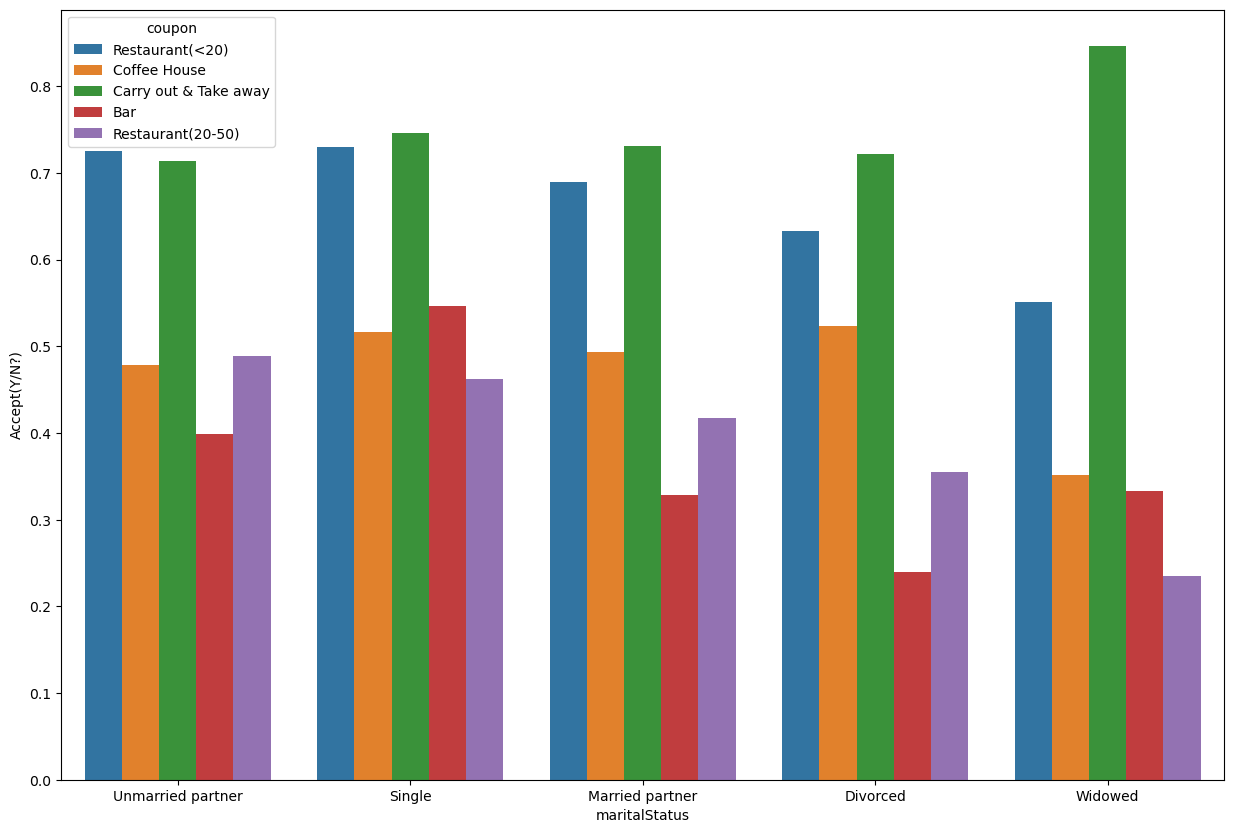

In [56]:
plt.figure(figsize = (15 , 10))
sns.barplot(x='maritalStatus',y='Accept(Y/N?)',hue='coupon',data=df_copy,errorbar=None)

From the above plot:

- Most customers are married
- Bar coupons are mostly accepted by Single
- Most customers are accepting Carry out & Take away
- Acceptance rate of Restaurant(<20) is higher in Unmarried partner and Single.

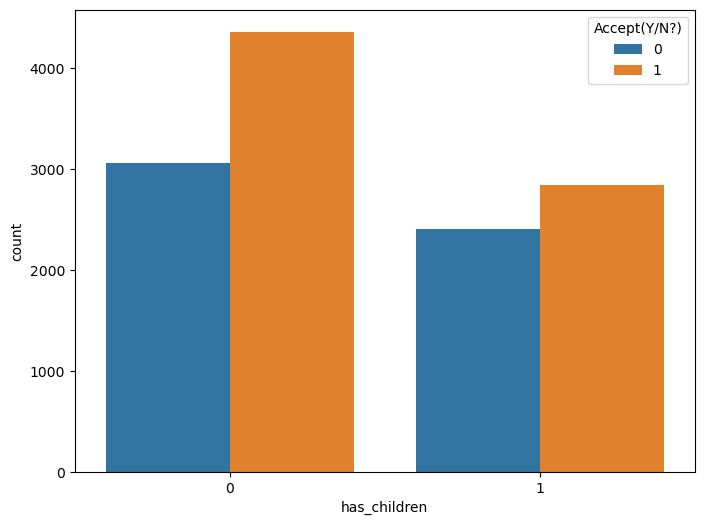

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
has_children,,,,,
0,7431,4365,3066,58.740412,41.259588
1,5253,2845,2408,54.159528,45.840472


In [57]:
show('has_children')

The majority of customers do not have children, resulting in an acceptance rate of 58%.

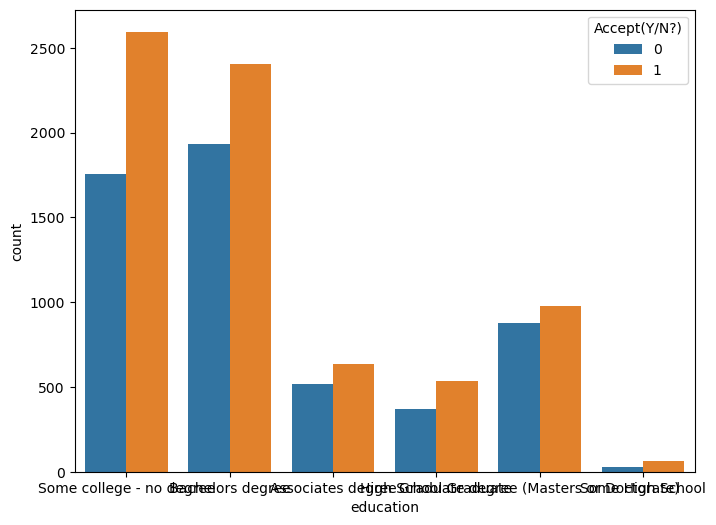

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
education,,,,,
Associates degree,1153,638,515,55.333912,44.666088
Bachelors degree,4335,2403,1932,55.432526,44.567474
Graduate degree (Masters or Doctorate),1852,975,877,52.645788,47.354212
High School Graduate,905,536,369,59.226519,40.773481
Some High School,88,63,25,71.590909,28.409091
Some college - no degree,4351,2595,1756,59.641462,40.358538


In [58]:
show('education')

<Axes: xlabel='education', ylabel='Accept(Y/N?)'>

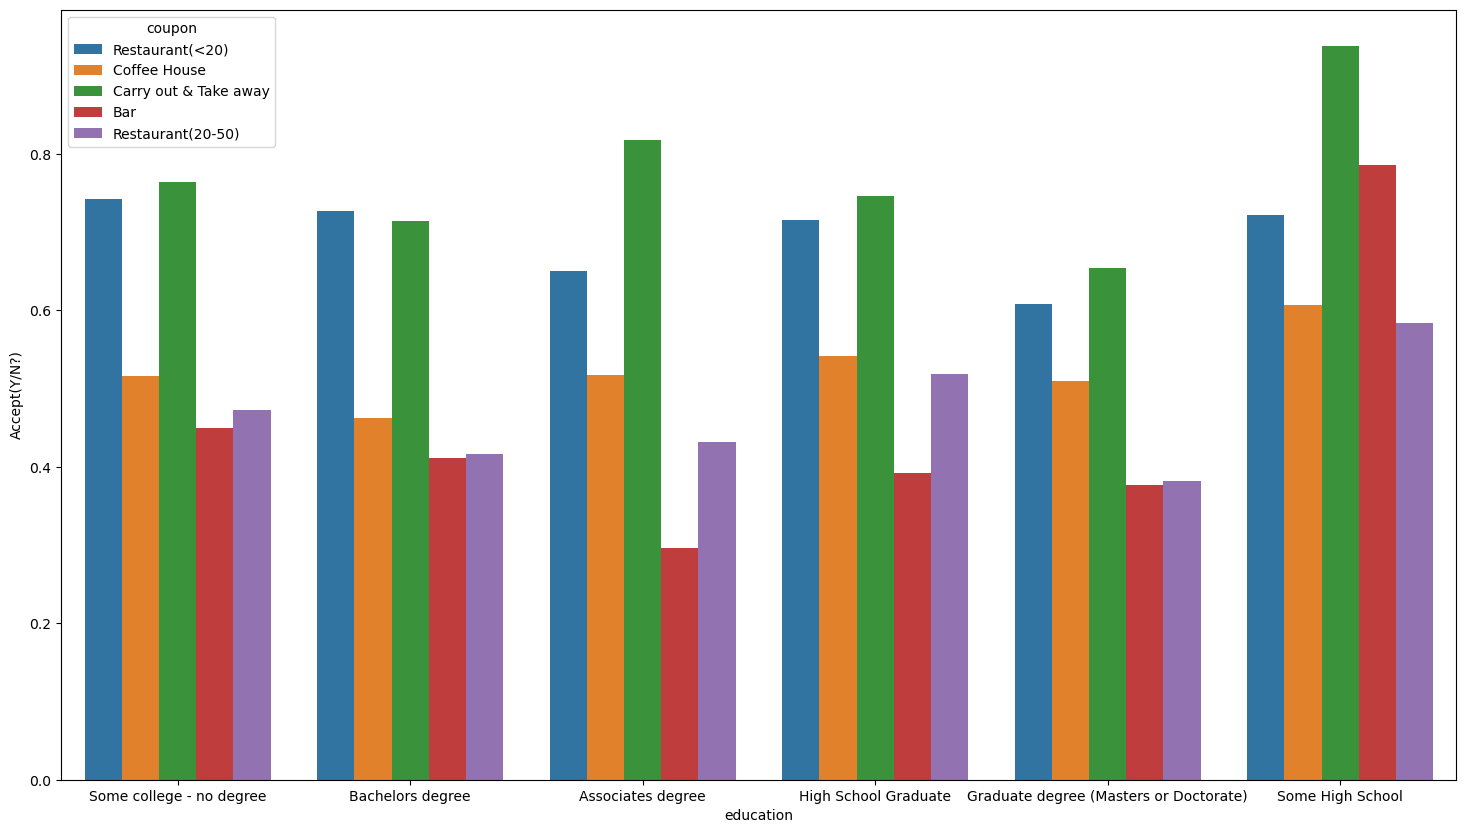

In [59]:
plt.figure(figsize = (18 , 10))
sns.barplot(x='education',y='Accept(Y/N?)',data=df_copy,hue='coupon',errorbar=None)

- Customers with Some High School has highest acceptance rate(71%)
- Bar coupons are mostly accepted by Some High School customers.
- Bar coupons are least accepted by Associates customers.
- Coffee House coupons are accepted amoung all the customers almost equally.
- Carry out & Take away coupons are accepted by all the customers in large amount,but Some High School customers acceptance rate is higher.

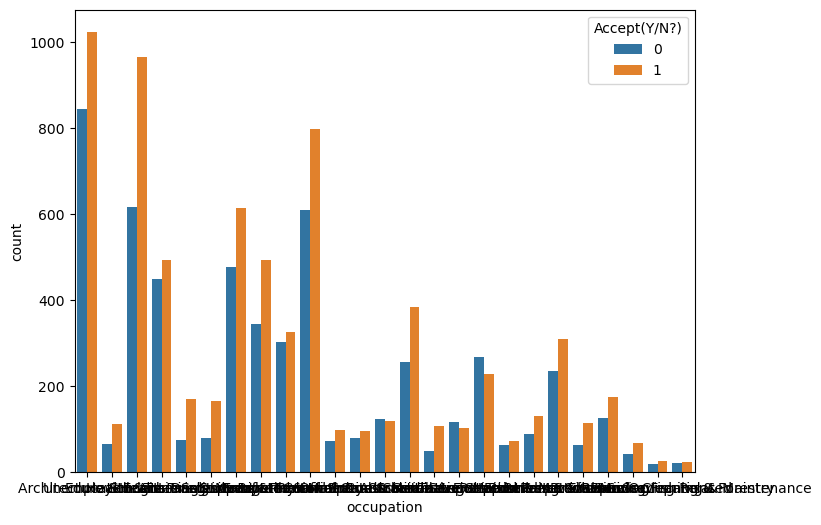

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
occupation,,,,,
Architecture & Engineering,175,111,64,63.428571,36.571429
Arts Design Entertainment Sports & Media,629,326,303,51.828299,48.171701
Building & Grounds Cleaning & Maintenance,44,26,18,59.090909,40.909091
Business & Financial,544,310,234,56.985294,43.014706
Community & Social Services,241,118,123,48.962656,51.037344
Computer & Mathematical,1408,798,610,56.676136,43.323864
Construction & Extraction,154,106,48,68.831169,31.168831
Education&Training&Library,943,494,449,52.386002,47.613998
Farming Fishing & Forestry,43,23,20,53.488372,46.511628


In [60]:
show('occupation')

<Axes: xlabel='count', ylabel='occupation'>

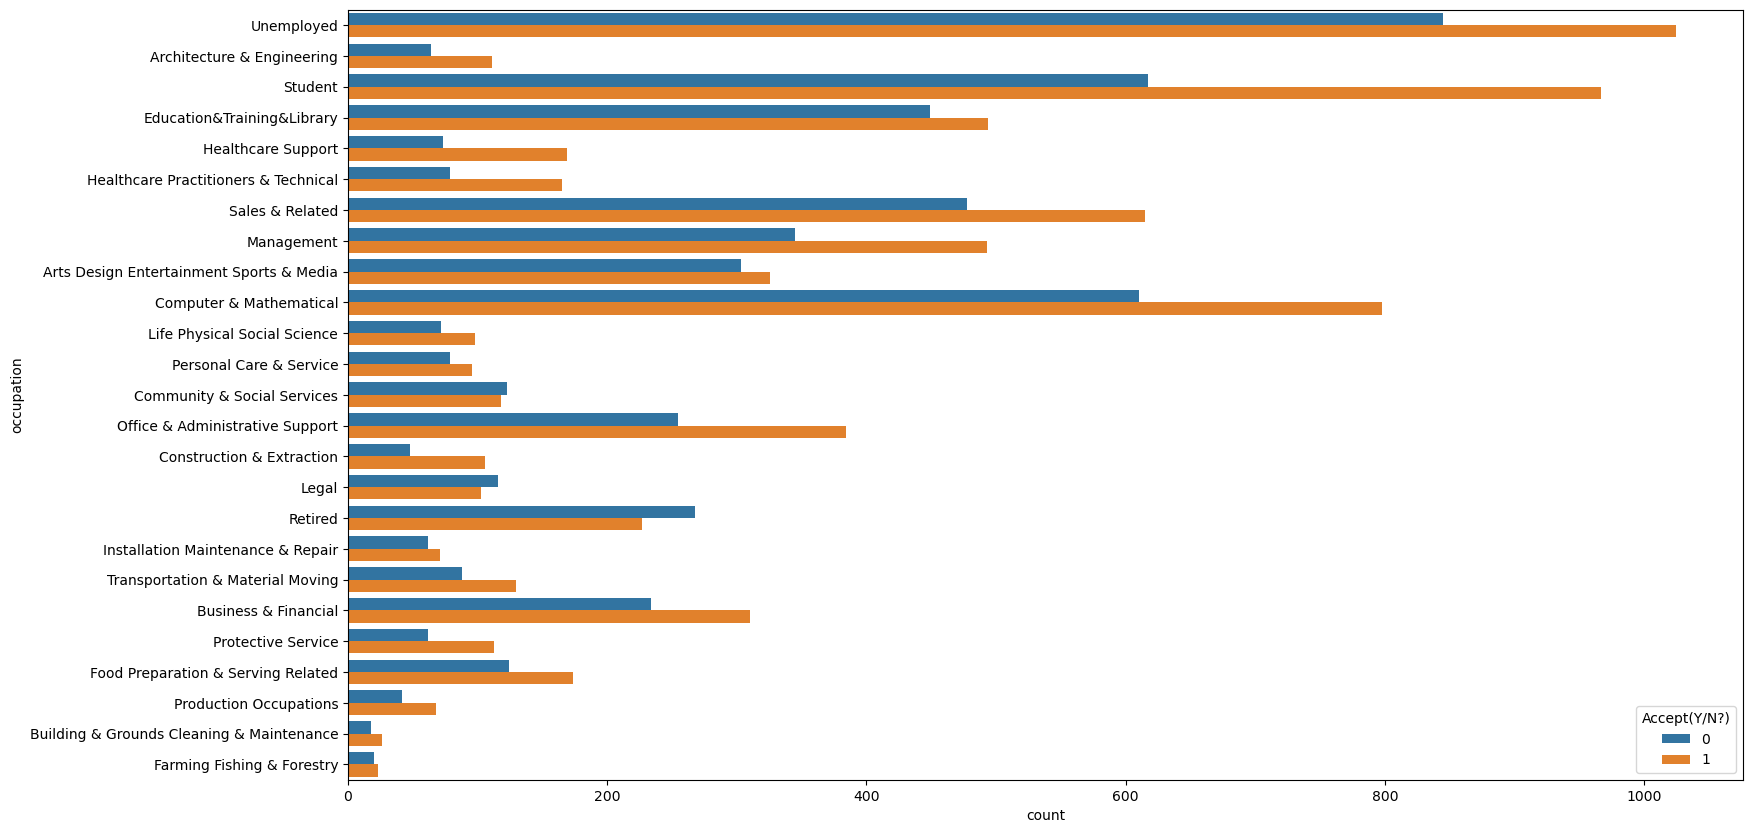

In [61]:
plt.figure(figsize = (18 , 10))
sns.countplot(y='occupation',data=df_copy,hue='Accept(Y/N?)',orient='h')

- Customers with healthcare support has the most amount of acceptance rate(69%).
- Number of unemployed customers are more.
- Occupation like Farming Fishing & Forestry has the least amount of customers.
- Most number of customers the are accepting the coupons are unemployed.

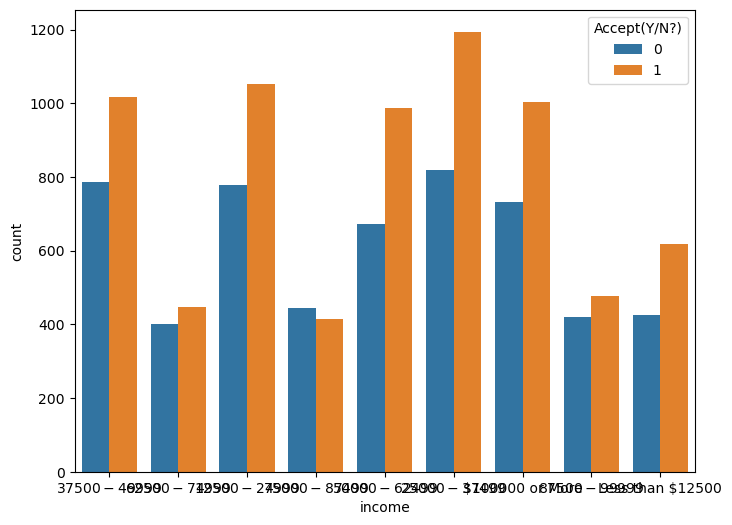

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
income,,,,,
$100000 or More,1736,1004,732,57.834101,42.165899
$12500 - $24999,1831,1052,779,57.454943,42.545057
$25000 - $37499,2013,1194,819,59.314456,40.685544
$37500 - $49999,1805,1018,787,56.398892,43.601108
$50000 - $62499,1659,988,671,59.553948,40.446052
$62500 - $74999,846,446,400,52.718676,47.281324
$75000 - $87499,857,414,443,48.308051,51.691949
$87500 - $99999,895,476,419,53.184358,46.815642
Less than $12500,1042,618,424,59.309021,40.690979


In [62]:
show('income')

<Axes: xlabel='income', ylabel='count'>

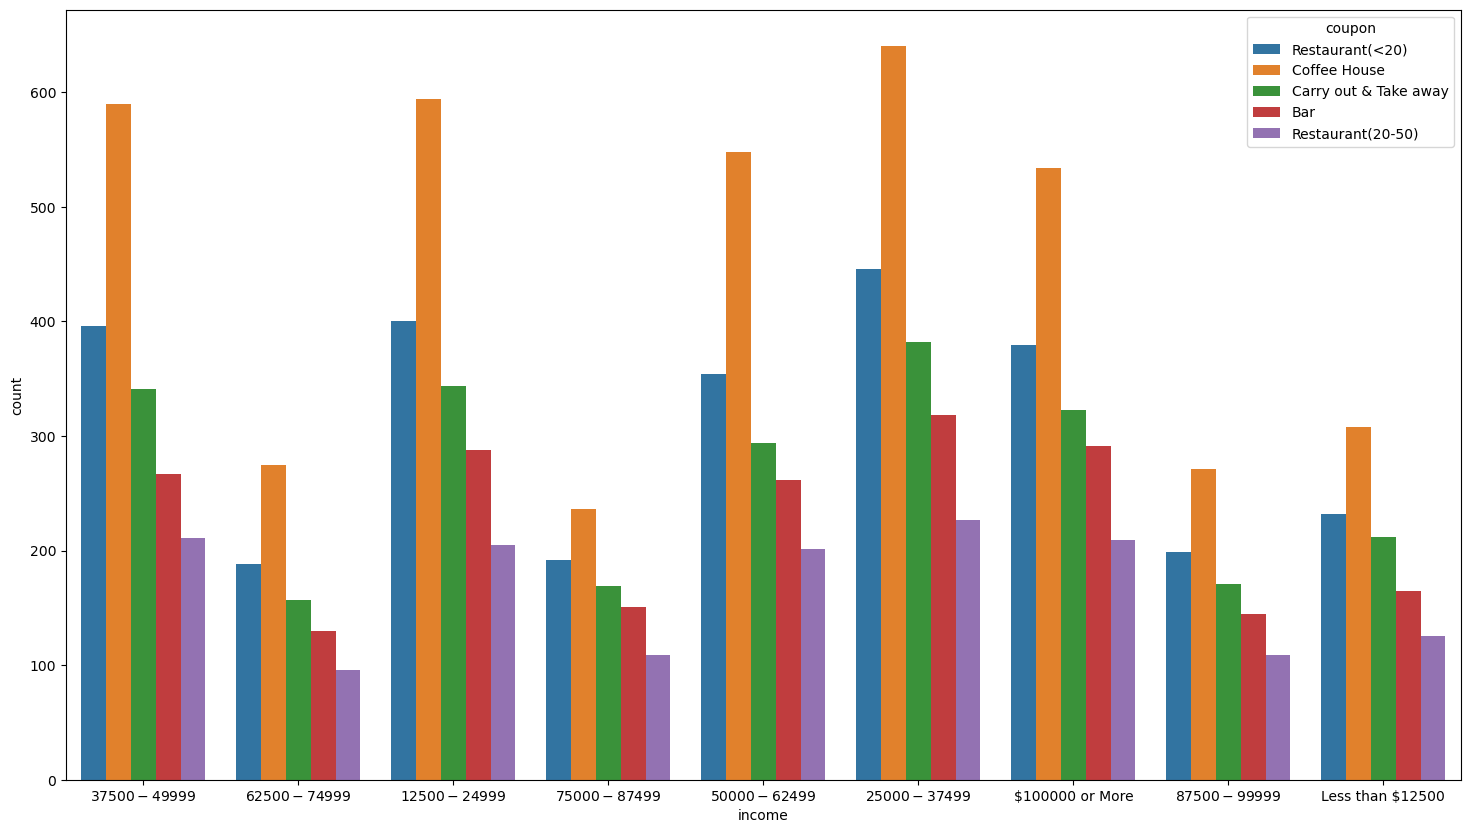

In [63]:
plt.figure(figsize = (18 , 10))
sns.countplot(x='income',data=df_copy,hue='coupon')

- Most customers are having income in the range between 25000 - 37499 and most of the coupons are accepted in this range.
- Customers with the income range of : (25000-37499),(50000-62499),(less than $12500),has high acceptance rate of 59%.
- Acceptance of Coffee House coupons is highest in income of 25000-37499.
- Income range of 62500-74999 has the least amount of customers accepting coupons.

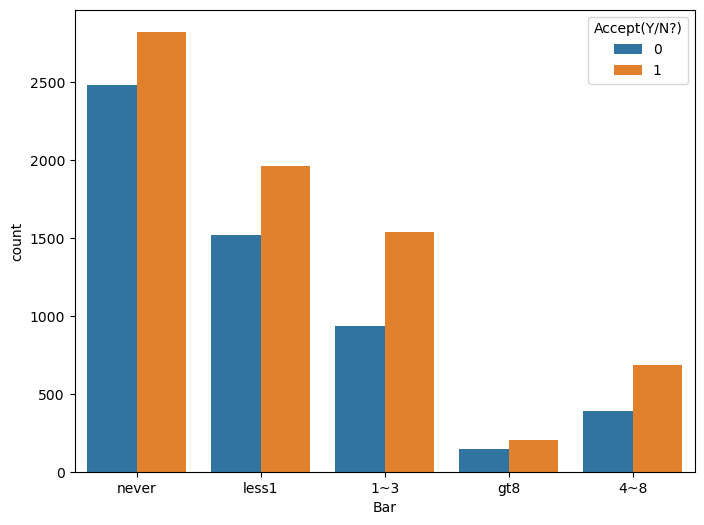

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
Bar,,,,,
1~3,2473,1538,935,62.191670,37.808330
4~8,1076,686,390,63.754647,36.245353
gt8,349,201,148,57.593123,42.406877
less1,3482,1963,1519,56.375646,43.624354
never,5304,2822,2482,53.205128,46.794872


In [64]:
show('Bar')

<Axes: xlabel='Bar', ylabel='Accept(Y/N?)'>

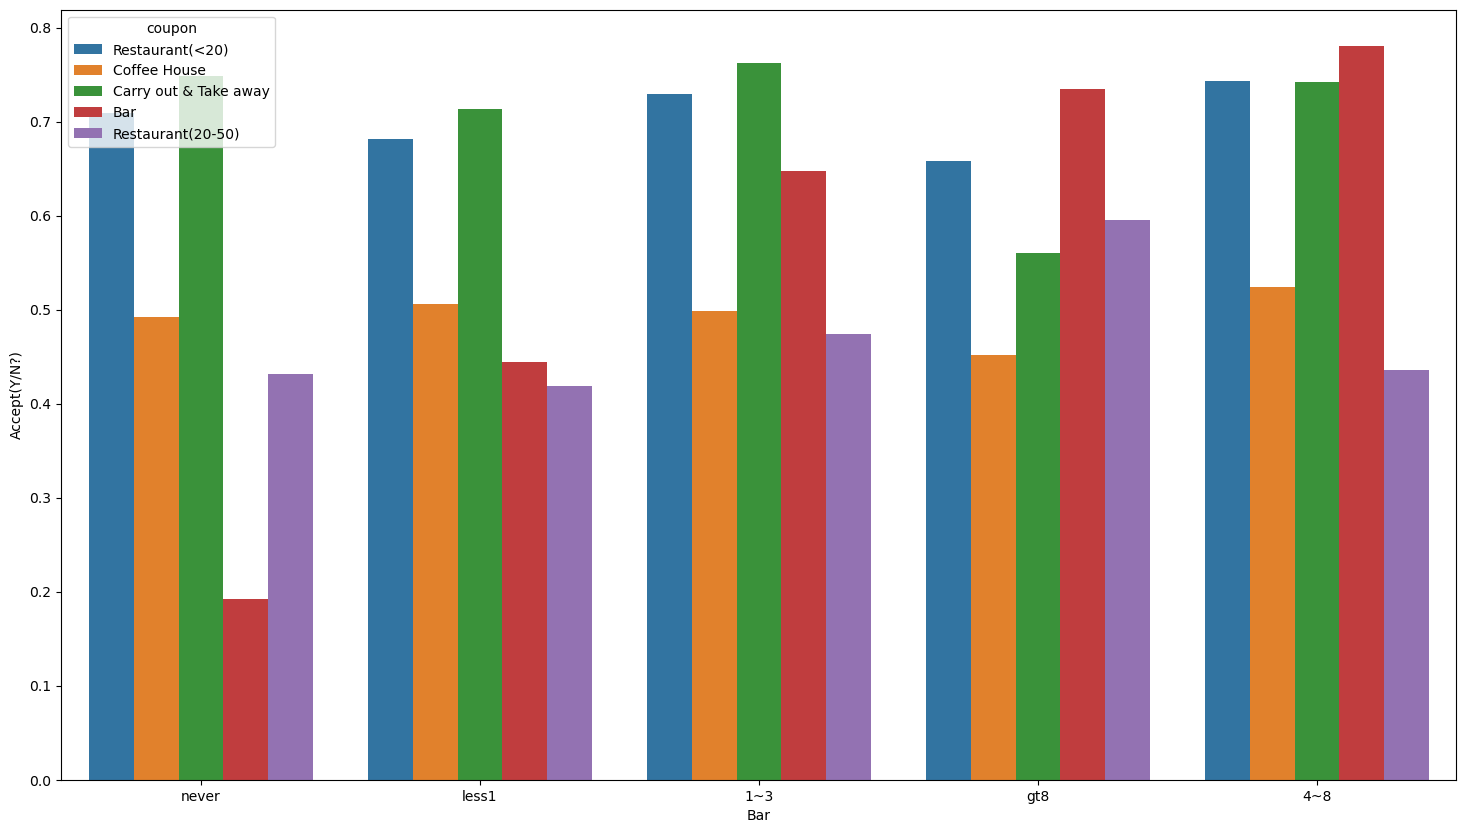

In [65]:
plt.figure(figsize = (18 , 10))
sns.barplot(x='Bar',y='Accept(Y/N?)',data=df_copy,hue='coupon',errorbar=None)

- Most number of customers have never visited the Bar.
- Acceptance rate is higher(63%) for the people that visit Bar 4 to 8 times per month,then cusotmers visiting Bar 1 to 3 times per month(62%)
- Customers who never visits Bar tend to accept restaurant coupons for expenses under $20, as well as Carry out & Take-away coupons in large amounts.

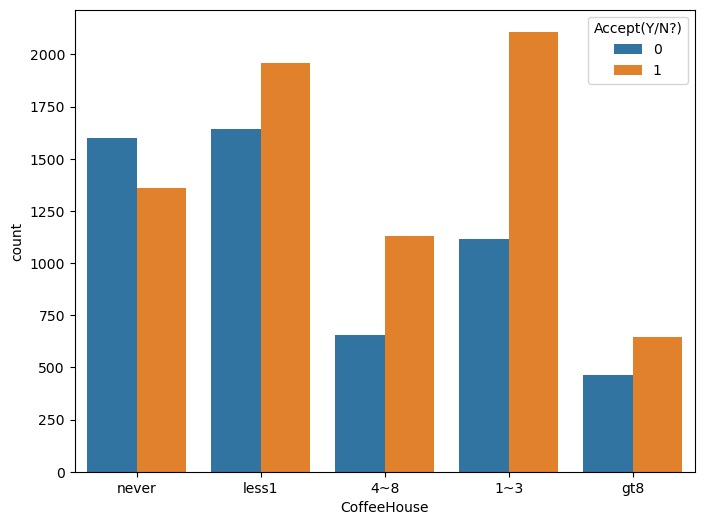

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
CoffeeHouse,,,,,
1~3,3225,2109,1116,65.395349,34.604651
4~8,1784,1130,654,63.340807,36.659193
gt8,1111,648,463,58.325833,41.674167
less1,3602,1961,1641,54.441977,45.558023
never,2962,1362,1600,45.982444,54.017556


In [66]:
show('CoffeeHouse')

<Axes: xlabel='CoffeeHouse', ylabel='Accept(Y/N?)'>

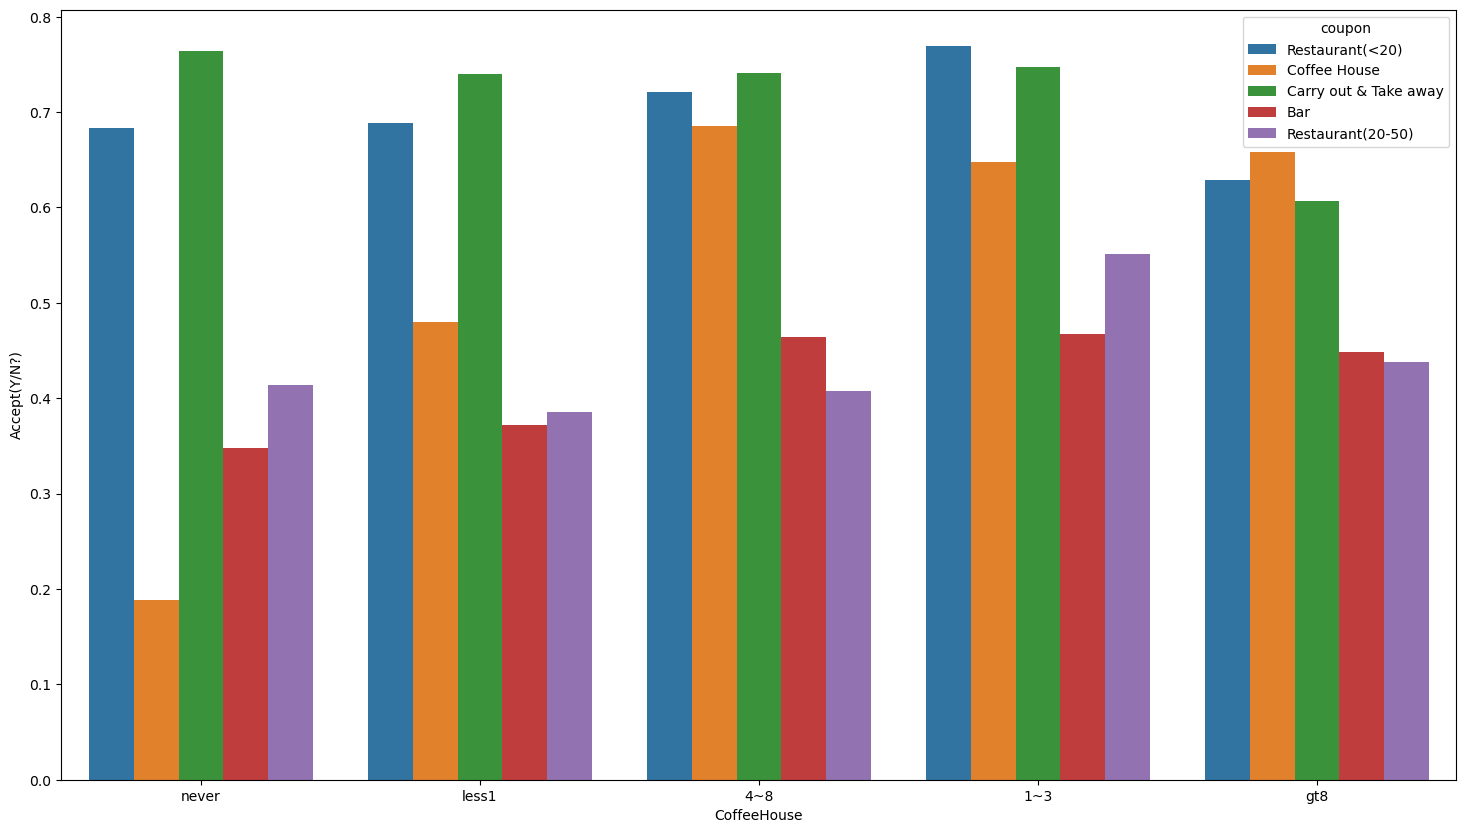

In [67]:
plt.figure(figsize = (18 , 10))
sns.barplot(x='CoffeeHouse',y='Accept(Y/N?)',hue='coupon',data=df_copy,errorbar=None)

- Most customers are visiting coffeeHouse for less than 1 time per month.
- Number of customers are less who visit CoffeeHouse more than 8 times per month.
- Customers who have never visited coffee house are accepting Carry out & Take away coupons more.
- Customers visiting coffeehouse 4 to 8 times and more than 8 times are likely to accept the coffeehouse coupons.

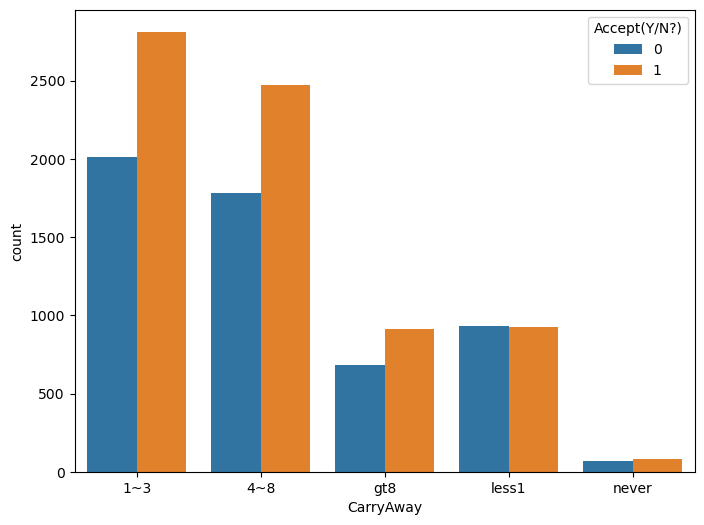

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
CarryAway,,,,,
1~3,4823,2813,2010,58.324694,41.675306
4~8,4258,2474,1784,58.102395,41.897605
gt8,1594,914,680,57.340025,42.659975
less1,1856,927,929,49.946121,50.053879
never,153,82,71,53.594771,46.405229


In [68]:
show('CarryAway')

<Axes: xlabel='CarryAway', ylabel='Accept(Y/N?)'>

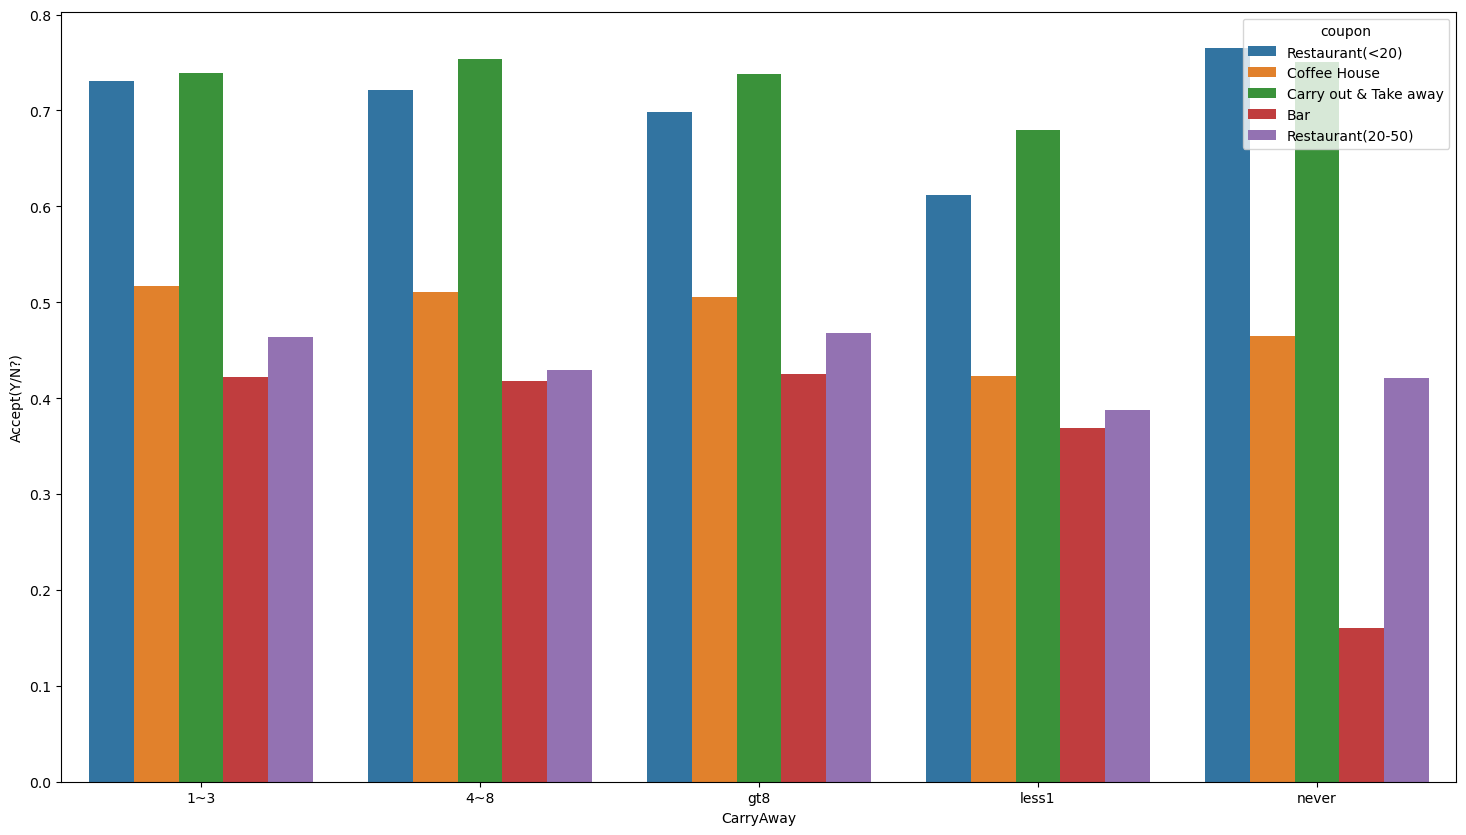

In [69]:
plt.figure(figsize = (18 , 10))
sns.barplot(x='CarryAway',y='Accept(Y/N?)',hue='coupon',data=df_copy,errorbar=None)

- Number of customers are more who take CarryAway 1 to 3 times per months.
- Customers who take CarryAway 1 to 3 times and 4 to 8 times per months have similar acceptance rate (58%)
- Customers who never take CarryAway and take CarryAway 4 to 8 times per months are likely to accept the coupons.
- Majority of customers who never take CarryAway uses coupons for Restaurant average spent less than 20.
- Most customers prefer coupons like Carry out & Take away , Restaurant>20(mainly food related)

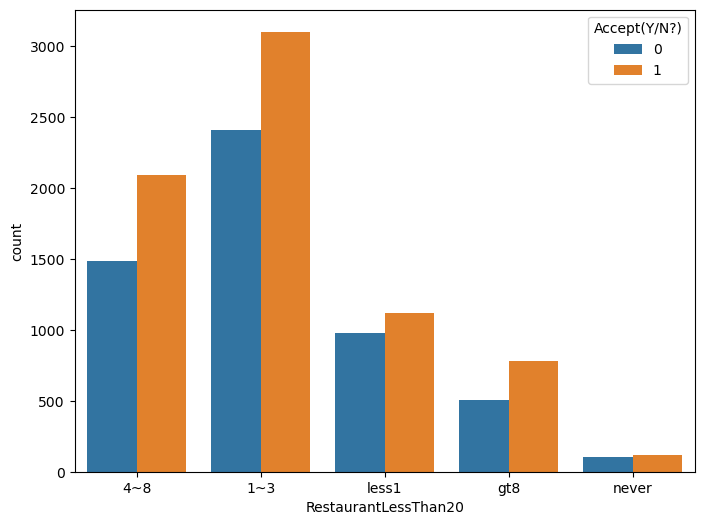

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
RestaurantLessThan20,,,,,
1~3,5506,3099,2407,56.284054,43.715946
4~8,3580,2093,1487,58.463687,41.536313
gt8,1285,781,504,60.778210,39.221790
less1,2093,1119,974,53.463927,46.536073
never,220,118,102,53.636364,46.363636


In [70]:
show('RestaurantLessThan20')

<Axes: xlabel='RestaurantLessThan20', ylabel='Accept(Y/N?)'>

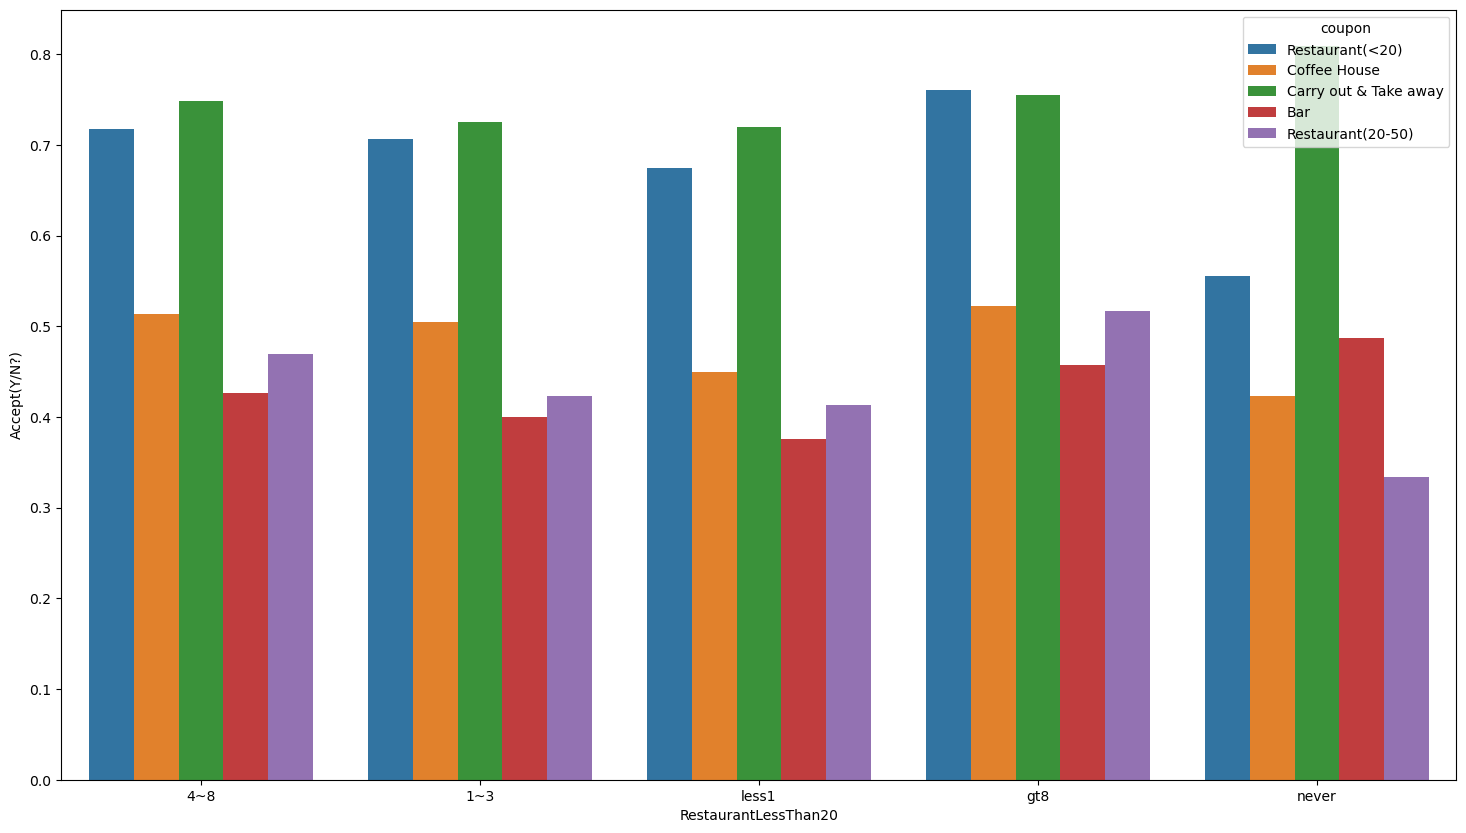

In [71]:
plt.figure(figsize = (18 , 10))
sns.barplot(x='RestaurantLessThan20',y='Accept(Y/N?)',data=df_copy,hue='coupon',errorbar=None)

- Most number of customers are vising to the Restaurant with average expense less than 20 for 1 to 3 times per month.
- Acceptance rate is similar for the customers visiting less than 1 or never(53%).
- Coupon acceptance rate is higher for the customers who visit more than 8 times per month.
- Majority of customers who never visit Restaurant with avg expense less than 20 accepts coupons for Carry out & Take away more.

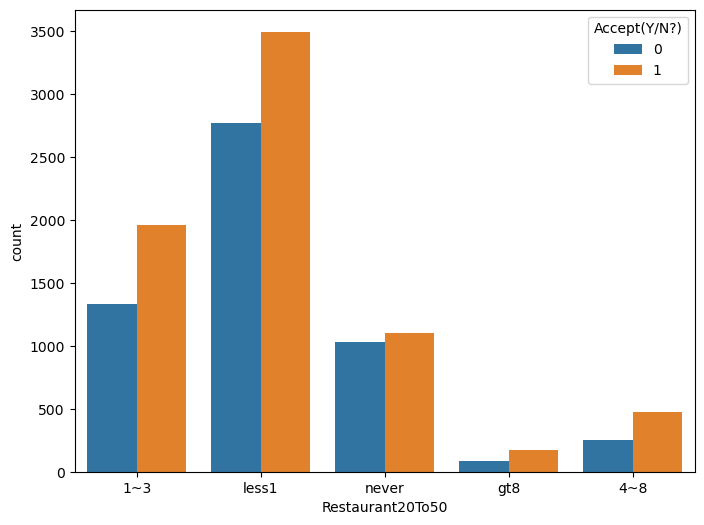

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
Restaurant20To50,,,,,
1~3,3290,1958,1332,59.513678,40.486322
4~8,728,477,251,65.521978,34.478022
gt8,264,175,89,66.287879,33.712121
less1,6266,3495,2771,55.777210,44.222790
never,2136,1105,1031,51.732210,48.267790


In [72]:
show('Restaurant20To50')

<Axes: xlabel='Restaurant20To50', ylabel='Accept(Y/N?)'>

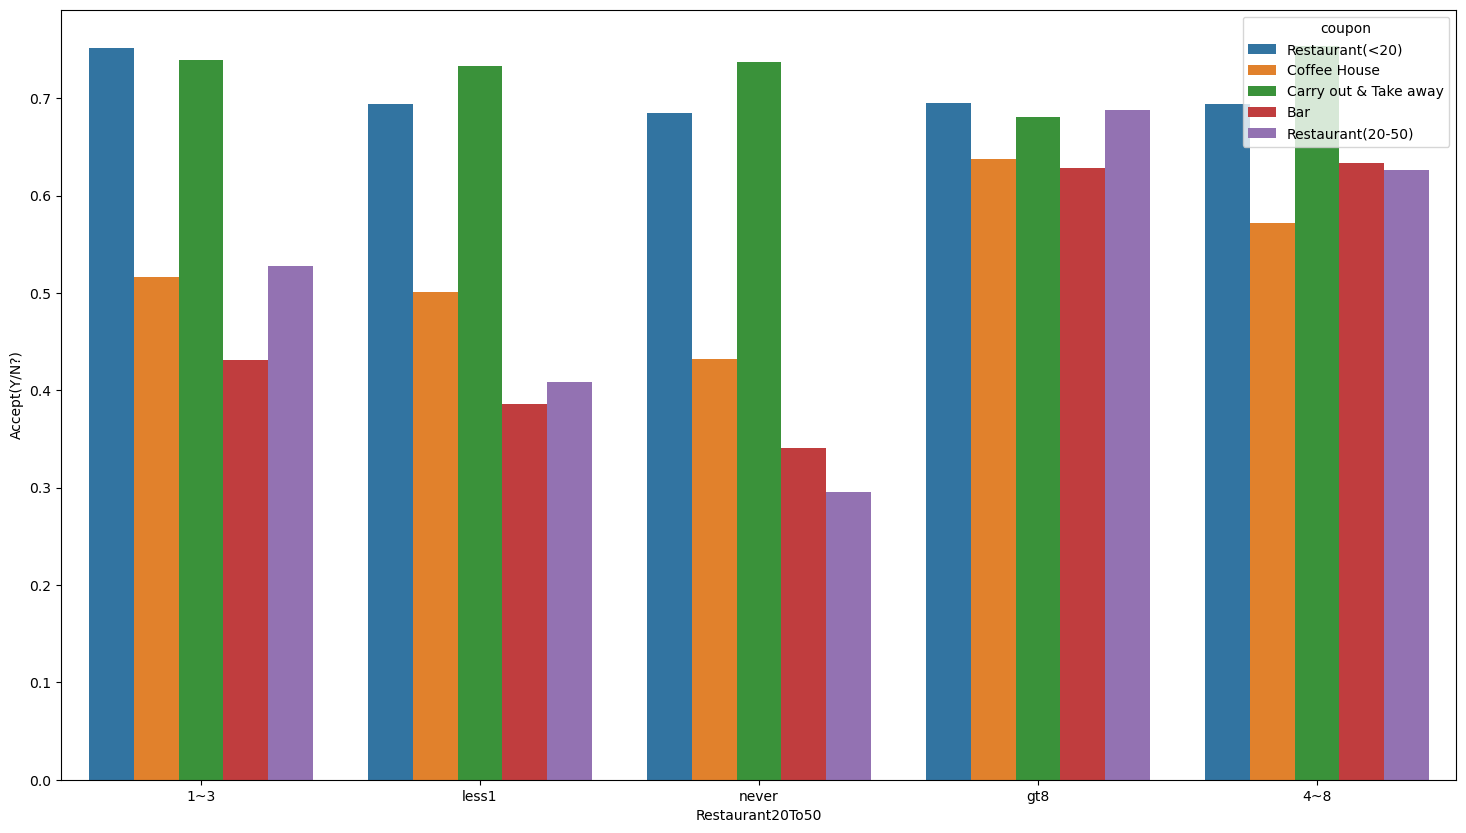

In [73]:
plt.figure(figsize = (18 , 10))
sns.barplot(x='Restaurant20To50',y='Accept(Y/N?)',hue='coupon',data=df_copy,errorbar=None)

- Most customers have visited less than 1 to the restaurants with 20 to 50 expense per month.
- Customers who like to visit restaurants with avg expense of 20 to 50 are visiting more than 8 times per month.
- Customers visitng these restaurants have all the coupons related to restaurants.
- Customers visiting restaurants also prefer carry out & Take away coupons in large quantities.









In [74]:
df_copy.head(10)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0


### Encoding

In [75]:
distance = []
for i in range(df_copy.shape[0]):
    if df_copy['toCoupon_GEQ5min'][i] == 0:
        distance.append('Less than 5 mins')
    elif (df_copy['toCoupon_GEQ5min'][i] == 1) and (df_copy['toCoupon_GEQ15min'][i] == 0):
        distance.append('5 to 15 mins')
    elif (df_copy['toCoupon_GEQ15min'][i] == 1) and (df_copy['toCoupon_GEQ25min'][i] == 0):
        distance.append('15 to 25 mins')
    else:  
        distance.append('More than 25 mins')

In [76]:
distance[1:15]

['5 to 15 mins',
 '15 to 25 mins',
 '15 to 25 mins',
 '15 to 25 mins',
 '15 to 25 mins',
 '15 to 25 mins',
 '15 to 25 mins',
 '15 to 25 mins',
 '15 to 25 mins',
 '5 to 15 mins',
 '15 to 25 mins',
 '15 to 25 mins',
 '5 to 15 mins',
 '15 to 25 mins']

In [77]:
df_copy['Distance']=distance

In [78]:
df_copy.head(5)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),Distance
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1,5 to 15 mins
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0,5 to 15 mins
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1,15 to 25 mins
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0,15 to 25 mins
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0,15 to 25 mins


Distance
15 to 25 mins        5611
5 to 15 mins         5562
More than 25 mins    1511
Name: count, dtype: int64


<Axes: xlabel='Distance', ylabel='count'>

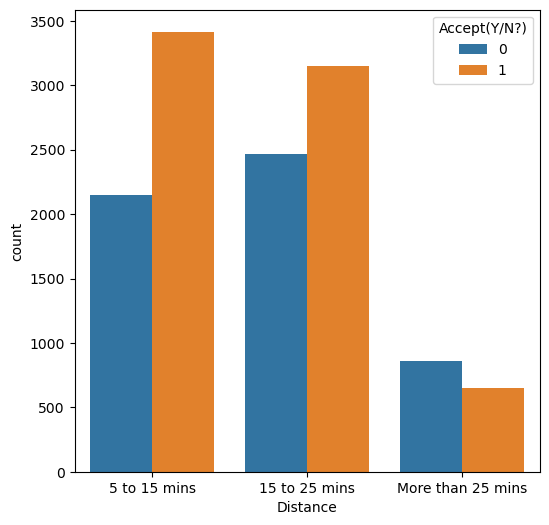

In [79]:
print(df_copy['Distance'].value_counts())
plt.figure(figsize = (6 , 6))
sns.countplot(x='Distance',hue='Accept(Y/N?)',data=df_copy)

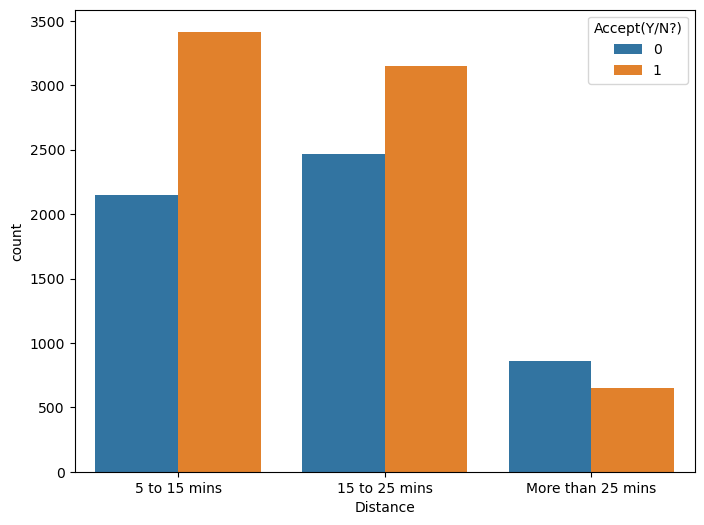

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
Distance,,,,,
15 to 25 mins,5611,3146,2465,56.068437,43.931563
5 to 15 mins,5562,3416,2146,61.416757,38.583243
More than 25 mins,1511,648,863,42.885506,57.114494


In [80]:
show('Distance')

<Axes: xlabel='Distance', ylabel='Accept(Y/N?)'>

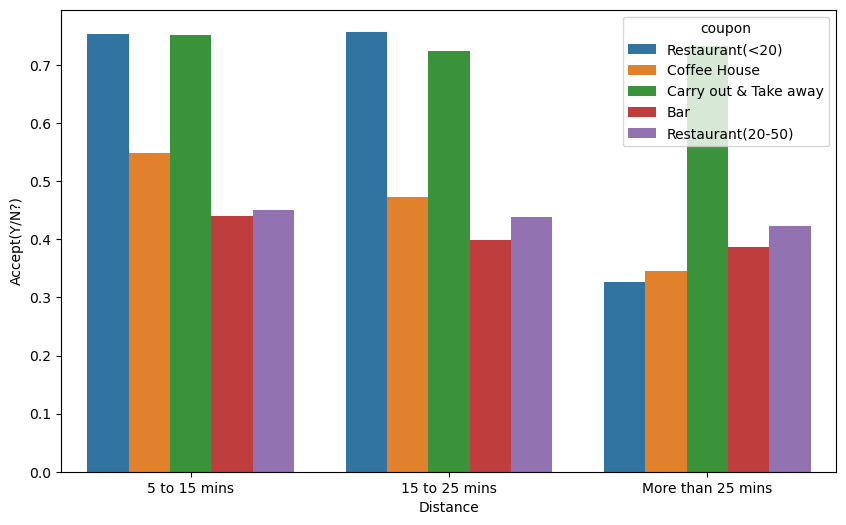

In [81]:
plt.figure(figsize = (10 , 6))
sns.barplot(x='Distance',y='Accept(Y/N?)',hue='coupon',data=df_copy,errorbar=None)

- Count of coupon utilization is more in 15 to 25mins of drive.
- Coupon acceptance rate is more(61%) in 5 to 15mins of drive.
- Customers who don't like to drive for long (5 to 15mins drive) accept coupons for Restaurant with avg expense less than 20 and Carry out & Take away.
- Customers who like to drive for long (More than 25mins) accept coupons for Carry out & Take away more.
- While driving customers prefer restaurant types coupons more.

In [82]:
df_copy.shape

(12684, 25)

### Dropping unnecessary features

Since we have consolidated the toCoupon_GEQ5min, toCoupon_GEQ15min, and toCoupon_GEQ25min columns into a single column, 
these original columns can be removed.



In [83]:
df_copy.drop(['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'],axis=1,inplace=True)


In [84]:
df_copy.shape

(12684, 22)

In [85]:
df_copy.head(5)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Accept(Y/N?),Distance
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,5 to 15 mins
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,5 to 15 mins
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,15 to 25 mins
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,15 to 25 mins
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,15 to 25 mins


### Finding out the correlation using heatman

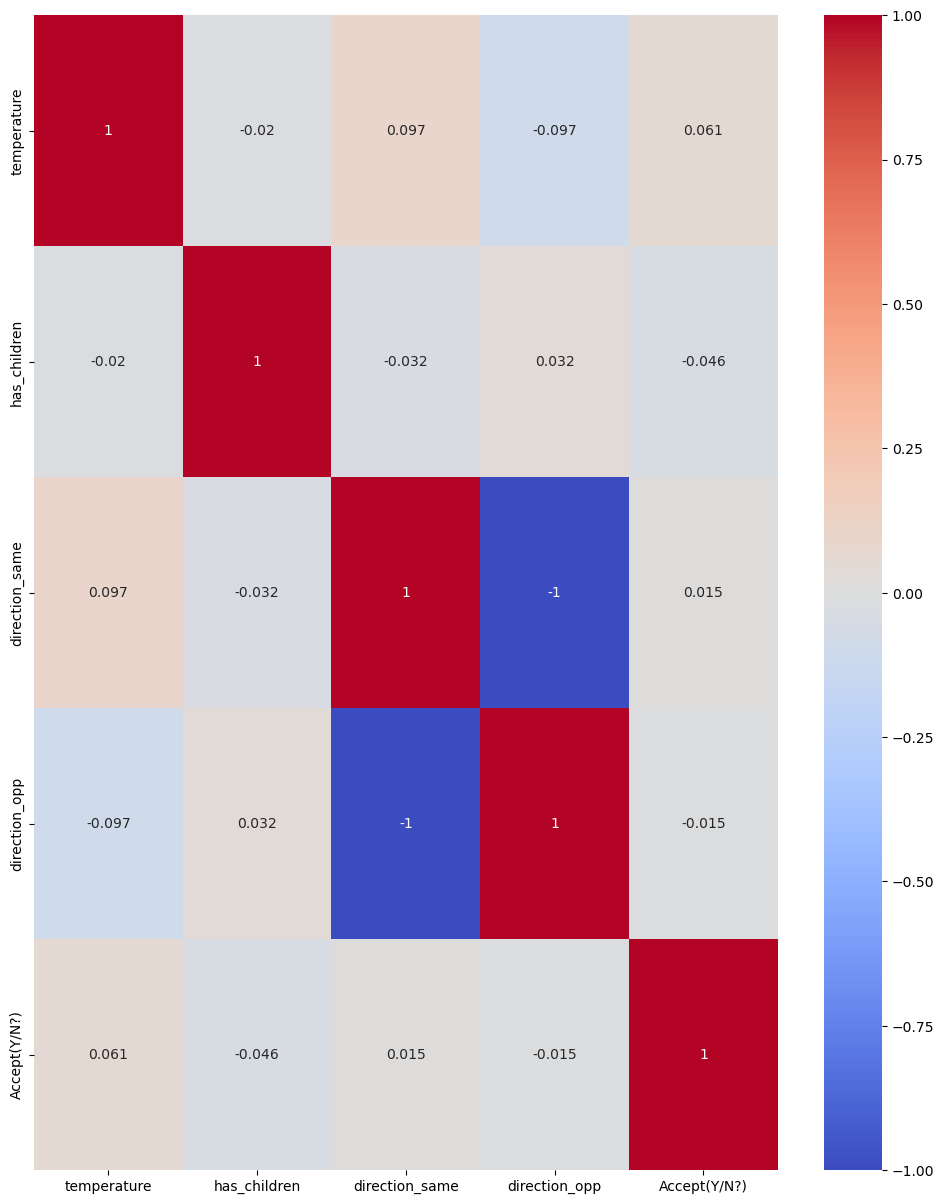

In [86]:
plt.figure(figsize = (12,15))
corr = df_copy.corr(numeric_only=True)
sns.heatmap(corr , annot = True , cmap = 'coolwarm')
plt.show()

In [87]:
df_copy.corr(numeric_only=True)  

,temperature,has_children,direction_same,direction_opp,Accept(Y/N?)
temperature,1.000000,-0.019716,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,-0.031620,0.031620,-0.045557
direction_same,0.097085,-0.031620,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,-1.000000,1.000000,-0.014570
Accept(Y/N?),0.061240,-0.045557,0.014570,-0.014570,1.000000


- There is a perfect negative correlation between direction_same and direction_opp of (-1). One of them shall be removed, because:

Avoid Multicollinearity

Reduce Redundancy

Improve Model Simplicity

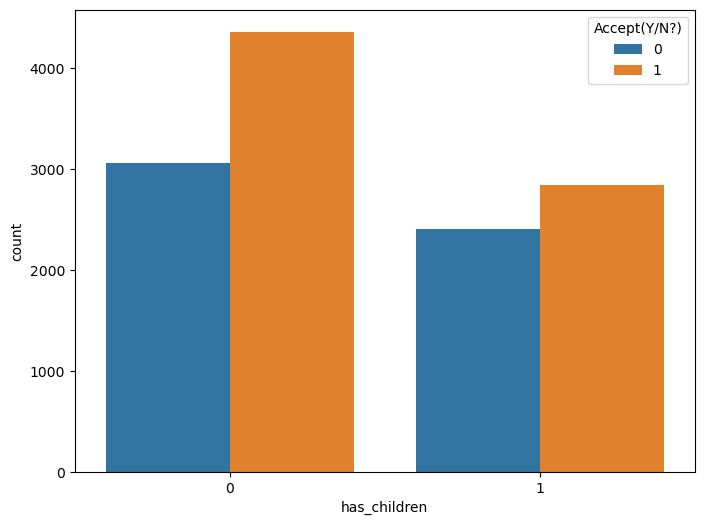

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
has_children,,,,,
0,7431,4365,3066,58.740412,41.259588
1,5253,2845,2408,54.159528,45.840472


In [88]:
show('has_children')

- The analysis indicates that the acceptance rates remain largely unchanged regardless of whether the customer has children.
- The heatmap confirms that there is no strong relationship between the variables. The correlation coefficient of -0.046 indicates an almost negligible relationship with coupon acceptance.

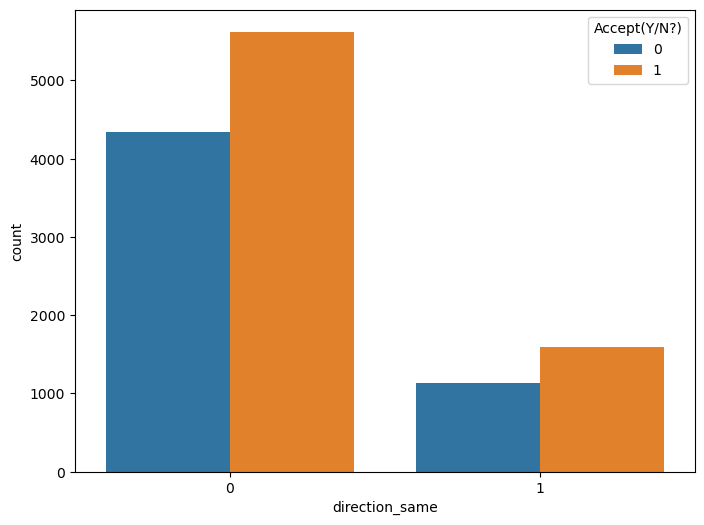

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
direction_same,,,,,
0,9960,5624,4336,56.465863,43.534137
1,2724,1586,1138,58.223201,41.776799


In [89]:
show('direction_same')

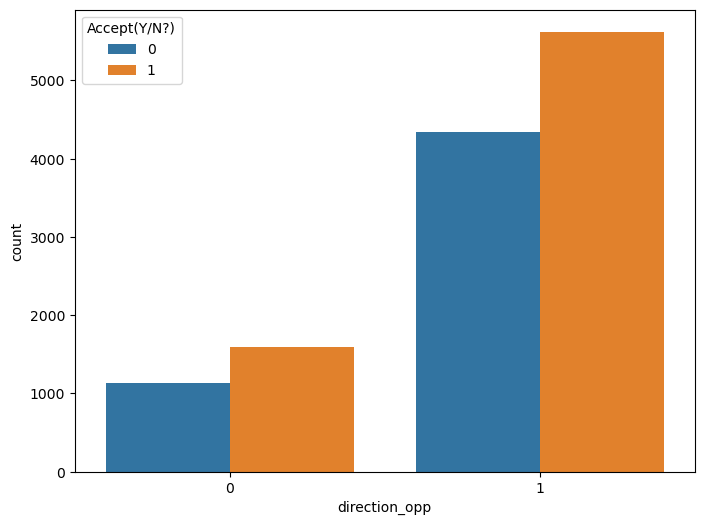

,Accept(Y/N?),accepted,rejected,Accepated %,Rejected %
direction_opp,,,,,
0,2724,1586,1138,58.223201,41.776799
1,9960,5624,4336,56.465863,43.534137


In [90]:
show('direction_opp')

- The analysis reveals that the acceptance rate remains largely unaffected by whether the customer is traveling in the same or opposite direction.
- The correlation of values direction_same and direction_opp columns are very close to 0, indicating almost no relationship between these variables and the target column Accept(Y/N?),This means neither direction_same nor direction_opp significantly influence coupon acceptance.

After thorough analysis, we conclude that the columns direction_same, direction_opp, and has_children can be dropped, as they have no significant impact on the prediction.

In [91]:
df_copy.drop(['has_children','direction_opp','direction_same'],axis=1,inplace=True)

In [92]:
df_copy.shape

(12684, 19)

In [93]:
for i in df_copy.columns:
    print(i)

destination
passanger
weather
temperature
coupon
expiration
gender
age
maritalStatus
education
occupation
income
Bar
CoffeeHouse
CarryAway
RestaurantLessThan20
Restaurant20To50
Accept(Y/N?)
Distance


In [94]:
df_copy1=df_copy

### One-Hot-Encoding

In [95]:
df_copy1=pd.get_dummies(df_copy1,columns=['destination','passanger','weather','coupon','expiration','gender','age','maritalStatus',
                                          'education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20',
                                          'Restaurant20To50','Distance'])

In [96]:
df_copy1.shape

(12684, 102)

In [97]:
df_copy1.columns.tolist()


['temperature',
 'Accept(Y/N?)',
 'destination_Home',
 'destination_No Urgent Place',
 'destination_Work',
 'passanger_Alone',
 'passanger_Friend(s)',
 'passanger_Kid(s)',
 'passanger_Partner',
 'weather_Rainy',
 'weather_Snowy',
 'weather_Sunny',
 'coupon_Bar',
 'coupon_Carry out & Take away',
 'coupon_Coffee House',
 'coupon_Restaurant(20-50)',
 'coupon_Restaurant(<20)',
 'expiration_1d',
 'expiration_2h',
 'gender_Female',
 'gender_Male',
 'age_21',
 'age_26',
 'age_31',
 'age_36',
 'age_41',
 'age_46',
 'age_50plus',
 'age_below21',
 'maritalStatus_Divorced',
 'maritalStatus_Married partner',
 'maritalStatus_Single',
 'maritalStatus_Unmarried partner',
 'maritalStatus_Widowed',
 'education_Associates degree',
 'education_Bachelors degree',
 'education_Graduate degree (Masters or Doctorate)',
 'education_High School Graduate',
 'education_Some High School',
 'education_Some college - no degree',
 'occupation_Architecture & Engineering',
 'occupation_Arts Design Entertainment Sports 

### dummy variable trap

In [98]:
df_copy1 = df_copy1.drop(['destination_Work','passanger_Partner','weather_Sunny','coupon_Restaurant(<20)','expiration_1d','age_below21','gender_Female',
'maritalStatus_Widowed', 'education_Some college - no degree','occupation_Unemployed','income_Less than $12500','Bar_never',
'CoffeeHouse_never','CarryAway_never','RestaurantLessThan20_never','Restaurant20To50_never','Distance_More than 25 mins'],axis =1)
df_copy1 = df_copy1.astype(int)

In [99]:
df_copy1.shape

(12684, 85)

#### Spliting of data into X and y

In [100]:
X=df_copy1.drop('Accept(Y/N?)',axis=1)
y=df_copy1['Accept(Y/N?)']

In [101]:
X.head()

,temperature,destination_Home,destination_No Urgent Place,passanger_Alone,passanger_Friend(s),passanger_Kid(s),weather_Rainy,weather_Snowy,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),expiration_2h,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Distance_15 to 25 mins,Distance_5 to 15 mins
0,55,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
1,80,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2,80,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
3,80,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
4,80,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0


In [102]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Accept(Y/N?), dtype: int32

## Performing train test split

In [134]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)
x_train = pd.DataFrame(x_train)  
x_test = pd.DataFrame(x_test)
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)
print( x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(10147, 84) (2537, 84) (10147,) (2537,)


### Logistic Regression

In [104]:
logistic=LogisticRegression()
logr = logistic.fit(x_train,y_train)
y_train_pred_log=logistic.predict(x_train)
y_test_pred_log=logistic.predict(x_test)

In [105]:
y_train_pred_log.shape

(10147,)

In [106]:
y_test_pred_log.shape

(2537,)

In [107]:
Training_log=accuracy_score(y_train,y_train_pred_log)
Testing_log = accuracy_score(y_test,y_test_pred_log)
print("training accuracy : ",Training_log)
print("testing accuracy : ",Testing_log)


training accuracy :  0.6890706612791958
testing accuracy :  0.6830902640914466


## Decision Tree

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [109]:
tree=DecisionTreeClassifier()
dtc=tree.fit(x_train,y_train)
y_train_pred_tree=dtc.predict(x_train)
y_test_pred_tree=dtc.predict(x_test)

In [110]:
Training_tree=accuracy_score(y_train,y_train_pred_tree)
Testing_tree=accuracy_score(y_test,y_test_pred_tree)
print("training accuracy : ",Training_tree)
print("testing accuracy : ",Testing_tree)

training accuracy :  0.9901448704050458
testing accuracy :  0.683878596767836


In [111]:
print(classification_report(y_test,y_test_pred_tree))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1128
           1       0.71      0.72      0.72      1409

    accuracy                           0.68      2537
   macro avg       0.68      0.68      0.68      2537
weighted avg       0.68      0.68      0.68      2537



### Random Forest

In [112]:
random = RandomForestClassifier()
rf = random.fit(x_train , y_train)

In [113]:
y_test_pred_rf = rf.predict(x_test)
y_train_pred_rf = rf.predict(x_train)

In [114]:
Training_rf=accuracy_score(y_train,y_train_pred_rf)
Testing_rf=accuracy_score(y_test,y_test_pred_rf)
print("training accuracy : ",Training_rf)
print("testing accuracy : ",Testing_rf)

training accuracy :  0.9901448704050458
testing accuracy :  0.7449743791880173


### K-nearest neighbour

In [115]:
KNN = KNeighborsClassifier()
kn_class = KNN.fit(x_train,y_train)

In [116]:
y_test_pred_knn = kn_class.predict(x_test)
y_train_pred_knn = kn_class.predict(x_train)

In [117]:
Training_knn=accuracy_score(y_train,y_train_pred_knn)
Testing_knn=accuracy_score(y_test,y_test_pred_knn)
print("training accuracy : ",Training_knn)
print("testing accuracy : ",Testing_knn)

training accuracy :  0.7784566867054302
testing accuracy :  0.6440677966101694


### Gradient boosting classifier

In [118]:
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train,y_train)
y_pred_test_gd = gdb.predict(x_test)
y_pred_train_gd = gdb.predict(x_train)
Training_gdb=accuracy_score(y_train , y_pred_train_gd)
Testing_gdb=accuracy_score(y_test , y_pred_test_gd)
print('training accu :' , Training_gdb)
print('testing accu  :' , Testing_gdb)

training accu : 0.7355868729673796
testing accu  : 0.7138352384706346


### Hyper parameter tuning using GridSearch CV

In [119]:
param_grid = {'n_estimators' : [50,100,200] ,
              'learning_rate' : [0.05 ,0.1 , 0.2 ],
              'max_depth'  : [3,5,7] }

In [120]:
gbm_model = GradientBoostingClassifier()


In [121]:
rf_grid = GridSearchCV(estimator = gbm_model , param_grid = param_grid ,scoring = 'accuracy', n_jobs = -1 , cv = 10)

In [122]:
rf_grid.fit(x_train , y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [123]:
rf_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

In [124]:
gbm = GradientBoostingClassifier(learning_rate = 0.1,n_estimators=200 , max_depth=7 )
gbm.fit(x_train , y_train)
y_pred_train_best_param = gbm.predict(x_train)
y_pred_test_best_param = gbm.predict(x_test)
print('training accuracy best param:' , accuracy_score(y_train , y_pred_train_best_param))
print('testing accuracy best param :' , accuracy_score(y_test , y_pred_test_best_param))

training accuracy best param: 0.9395880555829309
testing accuracy best param : 0.739850216791486


In [125]:
print('training accu GBM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu GBM :' , accuracy_score(y_test , y_pred_test_gd))

training accu GBM: 0.7355868729673796
testing accu GBM : 0.7138352384706346


In [126]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(gd , x_train , y_train , cv = 10)
testing_accuracy = cross_val_score(gd , x_test , y_test , cv = 10)
print('training_accuracy', training_accuracy )
print('testing_accuracy' ,testing_accuracy )

training_accuracy [0.72216749 0.70344828 0.6817734  0.72216749 0.71231527 0.73004926
 0.73004926 0.72189349 0.71794872 0.73668639]
testing_accuracy [0.70866142 0.66141732 0.62598425 0.68503937 0.7007874  0.66141732
 0.73228346 0.72332016 0.68774704 0.66798419]


In [127]:
print(classification_report(y_test , y_pred_test_gd))


              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1128
           1       0.72      0.80      0.76      1409

    accuracy                           0.71      2537
   macro avg       0.71      0.70      0.70      2537
weighted avg       0.71      0.71      0.71      2537



In [128]:
l1 = ['Logistic Regression','Decision Tree','Random Forest','K-nearest neighbour','Gradient boosting classifier']
l2 = [Training_log,Training_tree,Training_rf,Training_knn,Training_gdb]
l3 = [Testing_log,Testing_tree,Testing_rf,Testing_knn,Testing_gdb] 

                Algorithms used  Train Accuracy  Test Accuracy
0           Logistic Regression        0.689071       0.683090
1                 Decision Tree        0.990145       0.683879
2                 Random Forest        0.990145       0.744974
3           K-nearest neighbour        0.778457       0.644068
4  Gradient boosting classifier        0.735587       0.713835


Text(0.5, 1.0, 'Testing Accuracy')

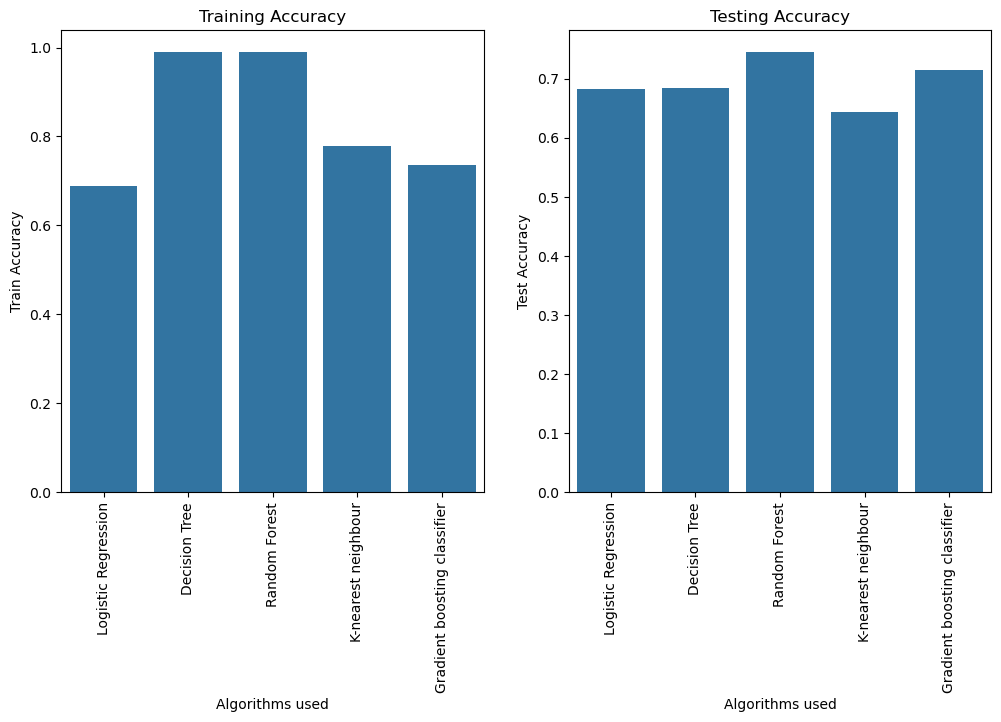

In [129]:
accuracy_df = pd.DataFrame({'Algorithms used': l1 , 'Train Accuracy' : l2 ,
                            'Test Accuracy' : l3})

print(accuracy_df)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
charts = sns.barplot(x = 'Algorithms used' , y = 'Train Accuracy' , data = accuracy_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Training Accuracy')

plt.subplot(1,2,2)
charts = sns.barplot(x = 'Algorithms used' , y = 'Test Accuracy' , data = accuracy_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Testing Accuracy')

#### The Gradient Boosting Classifier is delivering strong and reliable performance.
### Confusion matrix

In [130]:
matrix = confusion_matrix(y_test , y_pred_test_gd)
pd.crosstab(y_test.values.flatten(), y_pred_test_gd, rownames=['Actual'], colnames=['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,680,448,1128
1,278,1131,1409
All,958,1579,2537


In [131]:
df_copy1.to_csv('Analyzed_data')

In [132]:
#The End